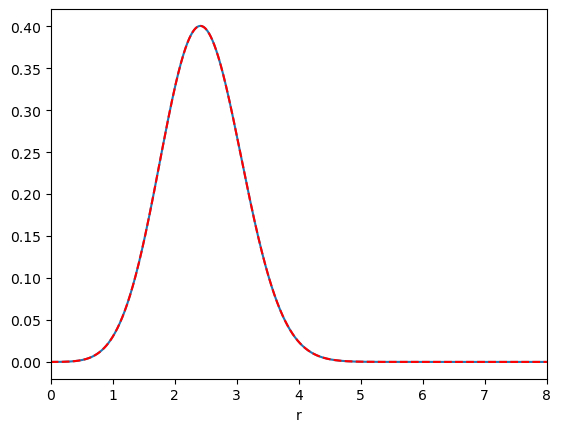

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 1                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

A0 = 0.08156369055

sigma = 1

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


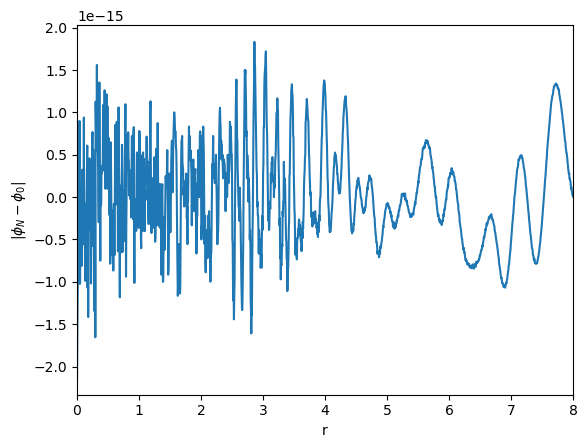

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.0010002505016765153 2.8674824572862545e-07 2.2077164558020223e-08 6.372691814940484e-09 1.1634075985573164e-09 2.2210349356425852e-10 4.1944083607344993e-11 7.91662654838167e-12 1.4940309416731401e-12 2.8195016817727307e-13 5.320888075975159e-14 1.004143390421432e-14 1.894991787045234e-15 3.576176092600257e-16 6.748860576355434e-17 1.273624799063497e-17 2.4035970545412344e-18 4.535523177068555e-19 8.56337897118148e-20 1.612038617922072e-20 3.072317219980653e-21 5.962169827111081e-22 7.53508829505565e-23 1.5134214425130969e-23 

In [4]:
# Equation for Krr: momentum constraint
# Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [5]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  



In [ ]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 12

It = int(tf/h)



t = 0


Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

t1 = np.linspace(0, tf, len(Alpha_origin))

V = 0

#for i in range(It): 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
  if t > 9:
    h = 0.0001
  #  Alpha_origin1[i] = 1 + np.dot(al0, psi_0)
  #  phi_origin1[i] = np.dot(a0, psi_0)
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000

0.4230000000000003
0.4240000000000003
0.4250000000000003
0.4260000000000003
0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033
0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.4730000

0.8520000000000006
0.8530000000000006
0.8540000000000006
0.8550000000000006
0.8560000000000006
0.8570000000000007
0.8580000000000007
0.8590000000000007
0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007
0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000

1.2939999999999683
1.2949999999999682
1.295999999999968
1.296999999999968
1.2979999999999678
1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666
1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.341999999999963
1.342999999999963
1.3439999999999628
1.3449999999999627
1.3459999999999626
1.3469

1.7349999999999197
1.7359999999999196
1.7369999999999195
1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187
1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915
1.777999999999915
1.7789999999999149
1.7799999999999148
1.7809999999999147
1.7819999999999145
1.7829999999999144
1.7839999999999143
1.7849999999999142
1.785999999999914
1.786999999999914
1.787

2.1819999999998707
2.1829999999998706
2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675
2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.2199999999998665
2.2209999999998664
2.2219999999998663
2.222999999999866
2.223999999999866
2.224999999999866
2.225999999999866
2.2269999999998658
2.2279999999998656
2.2289999999998655
2.2299999999998654
2.2309999999998653
2.231999999999865
2.232999999999865
2.233999999999865
2.234999999999865
2.

2.624999999999822
2.625999999999822
2.6269999999998217
2.6279999999998216
2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204
2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.6629999999998177
2.6639999999998176
2.6649999999998175
2.6659999999998174
2.6669999999998173
2.667999999999817
2.668999999999817
2.669999999999817
2.670999999999817
2.6719999999998167
2.6729999999998166
2.6739999999998165
2.6749999999998164
2.6759999999998163
2.676999999999816
2.677999999999816
2.

3.0719999999997727
3.0729999999997726
3.0739999999997725
3.0749999999997724
3.0759999999997722
3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705
3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.105999999999769
3.106999999999769
3.1079999999997687
3.1089999999997686
3.1099999999997685
3.1109999999997684
3.1119999999997683
3.112999999999768
3.113999999999768
3.114999999999768
3.115999999999768
3.1169999999997677
3.1179999999997676
3.1189999999997675
3.1199999999997674
3.1209999999997673
3.121999999999767
3.122999999999767
3.123999999999767
3.124999999999767
3.

3.515999999999724
3.5169999999997237
3.5179999999997236
3.5189999999997235
3.5199999999997234
3.5209999999997232
3.521999999999723
3.522999999999723
3.523999999999723
3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721
3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.5479999999997203
3.54899999999972
3.54999999999972
3.55099999999972
3.55199999999972
3.5529999999997197
3.5539999999997196
3.5549999999997195
3.5559999999997194
3.5569999999997193
3.557999999999719
3.558999999999719
3.559999999999719
3.560999999999719
3.5619999999997187
3.5629999999997186
3.5639999999997185
3.5649999999997184
3.5659999999997183
3.566999999999718
3.567999999999718
3.568999999999718
3.

3.9629999999996746
3.9639999999996745
3.9649999999996743
3.9659999999996742
3.966999999999674
3.967999999999674
3.968999999999674
3.969999999999674
3.9709999999996737
3.9719999999996736
3.9729999999996735
3.9739999999996733
3.9749999999996732
3.975999999999673
3.976999999999673
3.977999999999673
3.978999999999673
3.9799999999996727
3.9809999999996726
3.9819999999996725
3.9829999999996724
3.9839999999996722
3.984999999999672
3.985999999999672
3.986999999999672
3.987999999999672
3.9889999999996717
3.9899999999996716
3.9909999999996715
3.9919999999996714
3.9929999999996713
3.993999999999671
3.994999999999671
3.995999999999671
3.996999999999671
3.9979999999996707
3.9989999999996706
3.9999999999996705
4.000999999999671
4.001999999999671
4.0029999999996715
4.003999999999672
4.004999999999672
4.0059999999996725
4.006999999999673
4.007999999999673
4.0089999999996735
4.009999999999674
4.010999999999674
4.0119999999996745
4.012999999999675
4.013999999999675
4.0149999999996755
4.015999999999676
4

4.423999999999812
4.424999999999812
4.425999999999813
4.426999999999813
4.427999999999813
4.428999999999814
4.429999999999814
4.430999999999814
4.431999999999815
4.432999999999815
4.433999999999815
4.434999999999816
4.435999999999816
4.436999999999816
4.437999999999817
4.438999999999817
4.439999999999817
4.440999999999818
4.441999999999818
4.442999999999818
4.443999999999819
4.444999999999819
4.445999999999819
4.44699999999982
4.44799999999982
4.44899999999982
4.449999999999821
4.450999999999821
4.451999999999821
4.452999999999822
4.453999999999822
4.454999999999822
4.455999999999823
4.456999999999823
4.457999999999823
4.458999999999824
4.459999999999824
4.460999999999824
4.461999999999825
4.462999999999825
4.463999999999825
4.464999999999826
4.465999999999826
4.466999999999826
4.467999999999827
4.468999999999827
4.4699999999998274
4.470999999999828
4.471999999999828
4.4729999999998284
4.473999999999829
4.474999999999829
4.4759999999998294
4.47699999999983
4.47799999999983
4.4789999999

4.883999999999966
4.884999999999966
4.885999999999966
4.886999999999967
4.887999999999967
4.888999999999967
4.889999999999968
4.890999999999968
4.891999999999968
4.892999999999969
4.893999999999969
4.894999999999969
4.89599999999997
4.89699999999997
4.89799999999997
4.898999999999971
4.899999999999971
4.900999999999971
4.901999999999972
4.902999999999972
4.903999999999972
4.904999999999973
4.905999999999973
4.906999999999973
4.907999999999974
4.908999999999974
4.909999999999974
4.910999999999975
4.911999999999975
4.912999999999975
4.913999999999976
4.914999999999976
4.915999999999976
4.916999999999977
4.917999999999977
4.918999999999977
4.919999999999978
4.920999999999978
4.921999999999978
4.922999999999979
4.923999999999979
4.924999999999979
4.92599999999998
4.92699999999998
4.92799999999998
4.928999999999981
4.929999999999981
4.930999999999981
4.931999999999982
4.932999999999982
4.933999999999982
4.934999999999983
4.935999999999983
4.936999999999983
4.937999999999984
4.93899999999998

5.340000000000118
5.341000000000118
5.342000000000119
5.343000000000119
5.344000000000119
5.34500000000012
5.34600000000012
5.34700000000012
5.348000000000121
5.349000000000121
5.350000000000121
5.351000000000122
5.352000000000122
5.353000000000122
5.354000000000123
5.355000000000123
5.356000000000123
5.357000000000124
5.358000000000124
5.359000000000124
5.360000000000125
5.361000000000125
5.362000000000125
5.363000000000126
5.364000000000126
5.365000000000126
5.366000000000127
5.367000000000127
5.368000000000127
5.369000000000128
5.370000000000128
5.371000000000128
5.372000000000129
5.373000000000129
5.374000000000129
5.37500000000013
5.37600000000013
5.37700000000013
5.378000000000131
5.379000000000131
5.380000000000131
5.381000000000132
5.382000000000132
5.383000000000132
5.384000000000133
5.385000000000133
5.386000000000133
5.387000000000134
5.388000000000134
5.389000000000134
5.390000000000135
5.391000000000135
5.392000000000135
5.393000000000136
5.394000000000136
5.39500000000013

5.79500000000027
5.79600000000027
5.797000000000271
5.798000000000271
5.799000000000271
5.800000000000272
5.801000000000272
5.802000000000272
5.803000000000273
5.804000000000273
5.805000000000273
5.806000000000274
5.807000000000274
5.808000000000274
5.809000000000275
5.810000000000275
5.811000000000275
5.812000000000276
5.813000000000276
5.814000000000276
5.815000000000277
5.816000000000277
5.817000000000277
5.818000000000278
5.819000000000278
5.820000000000278
5.821000000000279
5.822000000000279
5.823000000000279
5.82400000000028
5.82500000000028
5.82600000000028
5.827000000000281
5.828000000000281
5.829000000000281
5.830000000000282
5.831000000000282
5.832000000000282
5.833000000000283
5.834000000000283
5.835000000000283
5.836000000000284
5.837000000000284
5.838000000000284
5.839000000000285
5.840000000000285
5.841000000000285
5.842000000000286
5.843000000000286
5.844000000000286
5.845000000000287
5.846000000000287
5.847000000000287
5.848000000000288
5.849000000000288
5.8500000000002

6.2520000000004226
6.253000000000423
6.254000000000423
6.2550000000004236
6.256000000000424
6.257000000000424
6.258000000000425
6.259000000000425
6.260000000000425
6.261000000000426
6.262000000000426
6.263000000000426
6.264000000000427
6.265000000000427
6.266000000000427
6.267000000000428
6.268000000000428
6.269000000000428
6.270000000000429
6.271000000000429
6.272000000000429
6.27300000000043
6.27400000000043
6.27500000000043
6.276000000000431
6.277000000000431
6.278000000000431
6.279000000000432
6.280000000000432
6.281000000000432
6.282000000000433
6.283000000000433
6.284000000000433
6.285000000000434
6.286000000000434
6.287000000000434
6.288000000000435
6.289000000000435
6.290000000000435
6.291000000000436
6.292000000000436
6.293000000000436
6.294000000000437
6.295000000000437
6.296000000000437
6.297000000000438
6.298000000000438
6.299000000000438
6.300000000000439
6.301000000000439
6.302000000000439
6.30300000000044
6.30400000000044
6.30500000000044
6.306000000000441
6.307000000000

6.711000000000576
6.712000000000576
6.7130000000005765
6.714000000000577
6.715000000000577
6.7160000000005775
6.717000000000578
6.718000000000578
6.7190000000005785
6.720000000000579
6.721000000000579
6.7220000000005795
6.72300000000058
6.72400000000058
6.7250000000005805
6.726000000000581
6.727000000000581
6.7280000000005815
6.729000000000582
6.730000000000582
6.7310000000005825
6.732000000000583
6.733000000000583
6.7340000000005835
6.735000000000584
6.736000000000584
6.7370000000005845
6.738000000000585
6.739000000000585
6.7400000000005855
6.741000000000586
6.742000000000586
6.7430000000005865
6.744000000000587
6.745000000000587
6.7460000000005875
6.747000000000588
6.748000000000588
6.7490000000005885
6.750000000000589
6.751000000000589
6.7520000000005895
6.75300000000059
6.75400000000059
6.7550000000005905
6.756000000000591
6.757000000000591
6.7580000000005915
6.759000000000592
6.760000000000592
6.7610000000005925
6.762000000000593
6.763000000000593
6.7640000000005935
6.765000000000

7.17200000000073
7.17300000000073
7.1740000000007305
7.175000000000731
7.176000000000731
7.1770000000007315
7.178000000000732
7.179000000000732
7.1800000000007325
7.181000000000733
7.182000000000733
7.1830000000007335
7.184000000000734
7.185000000000734
7.1860000000007345
7.187000000000735
7.188000000000735
7.1890000000007355
7.190000000000736
7.191000000000736
7.1920000000007365
7.193000000000737
7.194000000000737
7.1950000000007375
7.196000000000738
7.197000000000738
7.1980000000007385
7.199000000000739
7.200000000000739
7.2010000000007395
7.20200000000074
7.20300000000074
7.2040000000007405
7.205000000000741
7.206000000000741
7.2070000000007415
7.208000000000742
7.209000000000742
7.2100000000007425
7.211000000000743
7.212000000000743
7.2130000000007435
7.214000000000744
7.215000000000744
7.2160000000007445
7.217000000000745
7.218000000000745
7.2190000000007455
7.220000000000746
7.221000000000746
7.2220000000007465
7.223000000000747
7.224000000000747
7.2250000000007475
7.226000000000

7.627000000000882
7.628000000000882
7.629000000000882
7.630000000000883
7.631000000000883
7.632000000000883
7.633000000000884
7.634000000000884
7.635000000000884
7.636000000000885
7.637000000000885
7.638000000000885
7.639000000000886
7.640000000000886
7.641000000000886
7.642000000000887
7.643000000000887
7.644000000000887
7.645000000000888
7.646000000000888
7.647000000000888
7.648000000000889
7.649000000000889
7.650000000000889
7.65100000000089
7.65200000000089
7.65300000000089
7.654000000000891
7.655000000000891
7.656000000000891
7.657000000000892
7.658000000000892
7.659000000000892
7.660000000000893
7.661000000000893
7.662000000000893
7.663000000000894
7.664000000000894
7.665000000000894
7.666000000000895
7.667000000000895
7.668000000000895
7.669000000000896
7.670000000000896
7.671000000000896
7.672000000000897
7.673000000000897
7.674000000000897
7.675000000000898
7.676000000000898
7.677000000000898
7.678000000000899
7.679000000000899
7.680000000000899
7.6810000000009
7.6820000000009

8.085000000000958
8.086000000000958
8.087000000000957
8.088000000000957
8.089000000000956
8.090000000000956
8.091000000000955
8.092000000000954
8.093000000000954
8.094000000000953
8.095000000000953
8.096000000000952
8.097000000000952
8.098000000000951
8.09900000000095
8.10000000000095
8.10100000000095
8.102000000000949
8.103000000000948
8.104000000000948
8.105000000000947
8.106000000000947
8.107000000000946
8.108000000000946
8.109000000000945
8.110000000000944
8.111000000000944
8.112000000000943
8.113000000000943
8.114000000000942
8.115000000000942
8.116000000000941
8.11700000000094
8.11800000000094
8.11900000000094
8.120000000000939
8.121000000000938
8.122000000000938
8.123000000000937
8.124000000000937
8.125000000000936
8.126000000000936
8.127000000000935
8.128000000000934
8.129000000000934
8.130000000000933
8.131000000000933
8.132000000000932
8.133000000000932
8.134000000000931
8.13500000000093
8.13600000000093
8.13700000000093
8.138000000000929
8.139000000000928
8.140000000000928
8

8.5510000000007
8.5520000000007
8.553000000000699
8.554000000000698
8.555000000000698
8.556000000000697
8.557000000000697
8.558000000000696
8.559000000000696
8.560000000000695
8.561000000000694
8.562000000000694
8.563000000000693
8.564000000000693
8.565000000000692
8.566000000000692
8.567000000000691
8.56800000000069
8.56900000000069
8.57000000000069
8.571000000000689
8.572000000000688
8.573000000000688
8.574000000000687
8.575000000000687
8.576000000000686
8.577000000000686
8.578000000000685
8.579000000000685
8.580000000000684
8.581000000000683
8.582000000000683
8.583000000000682
8.584000000000682
8.585000000000681
8.58600000000068
8.58700000000068
8.58800000000068
8.589000000000679
8.590000000000678
8.591000000000678
8.592000000000677
8.593000000000677
8.594000000000676
8.595000000000676
8.596000000000675
8.597000000000675
8.598000000000674
8.599000000000673
8.600000000000673
8.601000000000672
8.602000000000672
8.603000000000671
8.60400000000067
8.60500000000067
8.60600000000067
8.607

9.001200000000448
9.001300000000448
9.001400000000448
9.001500000000448
9.001600000000447
9.001700000000447
9.001800000000447
9.001900000000447
9.002000000000447
9.002100000000446
9.002200000000446
9.002300000000446
9.002400000000446
9.002500000000445
9.002600000000445
9.002700000000445
9.002800000000445
9.002900000000444
9.003000000000444
9.003100000000444
9.003200000000444
9.003300000000444
9.003400000000443
9.003500000000443
9.003600000000443
9.003700000000443
9.003800000000442
9.003900000000442
9.004000000000442
9.004100000000442
9.004200000000441
9.004300000000441
9.004400000000441
9.00450000000044
9.00460000000044
9.00470000000044
9.00480000000044
9.00490000000044
9.00500000000044
9.00510000000044
9.005200000000439
9.005300000000439
9.005400000000439
9.005500000000438
9.005600000000438
9.005700000000438
9.005800000000438
9.005900000000437
9.006000000000437
9.006100000000437
9.006200000000437
9.006300000000437
9.006400000000436
9.006500000000436
9.006600000000436
9.006700000000436

9.047300000000341
9.04740000000034
9.04750000000034
9.04760000000034
9.04770000000034
9.04780000000034
9.04790000000034
9.04800000000034
9.048100000000339
9.048200000000339
9.048300000000339
9.048400000000338
9.048500000000338
9.048600000000338
9.048700000000338
9.048800000000337
9.048900000000337
9.049000000000337
9.049100000000337
9.049200000000337
9.049300000000336
9.049400000000336
9.049500000000336
9.049600000000336
9.049700000000335
9.049800000000335
9.049900000000335
9.050000000000335
9.050100000000334
9.050200000000334
9.050300000000334
9.050400000000334
9.050500000000334
9.050600000000333
9.050700000000333
9.050800000000333
9.050900000000333
9.051000000000332
9.051100000000332
9.051200000000332
9.051300000000332
9.051400000000331
9.051500000000331
9.051600000000331
9.05170000000033
9.05180000000033
9.05190000000033
9.05200000000033
9.05210000000033
9.05220000000033
9.05230000000033
9.052400000000329
9.052500000000329
9.052600000000329
9.052700000000328
9.052800000000328
9.0529

9.093600000000233
9.093700000000233
9.093800000000233
9.093900000000232
9.094000000000232
9.094100000000232
9.094200000000232
9.094300000000231
9.094400000000231
9.094500000000231
9.09460000000023
9.09470000000023
9.09480000000023
9.09490000000023
9.09500000000023
9.09510000000023
9.09520000000023
9.095300000000229
9.095400000000229
9.095500000000229
9.095600000000228
9.095700000000228
9.095800000000228
9.095900000000228
9.096000000000227
9.096100000000227
9.096200000000227
9.096300000000227
9.096400000000227
9.096500000000226
9.096600000000226
9.096700000000226
9.096800000000226
9.096900000000225
9.097000000000225
9.097100000000225
9.097200000000225
9.097300000000224
9.097400000000224
9.097500000000224
9.097600000000224
9.097700000000223
9.097800000000223
9.097900000000223
9.098000000000223
9.098100000000223
9.098200000000222
9.098300000000222
9.098400000000222
9.098500000000222
9.098600000000221
9.098700000000221
9.098800000000221
9.09890000000022
9.09900000000022
9.09910000000022
9.

9.139900000000125
9.140000000000125
9.140100000000125
9.140200000000124
9.140300000000124
9.140400000000124
9.140500000000124
9.140600000000124
9.140700000000123
9.140800000000123
9.140900000000123
9.141000000000123
9.141100000000122
9.141200000000122
9.141300000000122
9.141400000000122
9.141500000000121
9.141600000000121
9.141700000000121
9.14180000000012
9.14190000000012
9.14200000000012
9.14210000000012
9.14220000000012
9.14230000000012
9.14240000000012
9.142500000000119
9.142600000000119
9.142700000000119
9.142800000000118
9.142900000000118
9.143000000000118
9.143100000000118
9.143200000000117
9.143300000000117
9.143400000000117
9.143500000000117
9.143600000000117
9.143700000000116
9.143800000000116
9.143900000000116
9.144000000000116
9.144100000000115
9.144200000000115
9.144300000000115
9.144400000000115
9.144500000000114
9.144600000000114
9.144700000000114
9.144800000000114
9.144900000000113
9.145000000000113
9.145100000000113
9.145200000000113
9.145300000000113
9.145400000000112

9.186100000000017
9.186200000000017
9.186300000000017
9.186400000000017
9.186500000000017
9.186600000000016
9.186700000000016
9.186800000000016
9.186900000000016
9.187000000000015
9.187100000000015
9.187200000000015
9.187300000000015
9.187400000000014
9.187500000000014
9.187600000000014
9.187700000000014
9.187800000000014
9.187900000000013
9.188000000000013
9.188100000000013
9.188200000000013
9.188300000000012
9.188400000000012
9.188500000000012
9.188600000000012
9.188700000000011
9.188800000000011
9.188900000000011
9.18900000000001
9.18910000000001
9.18920000000001
9.18930000000001
9.18940000000001
9.18950000000001
9.18960000000001
9.189700000000009
9.189800000000009
9.189900000000009
9.190000000000008
9.190100000000008
9.190200000000008
9.190300000000008
9.190400000000007
9.190500000000007
9.190600000000007
9.190700000000007
9.190800000000007
9.190900000000006
9.191000000000006
9.191100000000006
9.191200000000006
9.191300000000005
9.191400000000005
9.191500000000005
9.191600000000005

9.233099999999908
9.233199999999908
9.233299999999907
9.233399999999907
9.233499999999907
9.233599999999907
9.233699999999907
9.233799999999906
9.233899999999906
9.233999999999906
9.234099999999906
9.234199999999905
9.234299999999905
9.234399999999905
9.234499999999905
9.234599999999904
9.234699999999904
9.234799999999904
9.234899999999904
9.234999999999904
9.235099999999903
9.235199999999903
9.235299999999903
9.235399999999903
9.235499999999902
9.235599999999902
9.235699999999902
9.235799999999902
9.235899999999901
9.235999999999901
9.236099999999901
9.2361999999999
9.2362999999999
9.2363999999999
9.2364999999999
9.2365999999999
9.2366999999999
9.2367999999999
9.236899999999899
9.236999999999899
9.237099999999899
9.237199999999898
9.237299999999898
9.237399999999898
9.237499999999898
9.237599999999897
9.237699999999897
9.237799999999897
9.237899999999897
9.237999999999897
9.238099999999896
9.238199999999896
9.238299999999896
9.238399999999896
9.238499999999895
9.238599999999895
9.2386

9.2795999999998
9.2796999999998
9.279799999999799
9.279899999999799
9.279999999999799
9.280099999999798
9.280199999999798
9.280299999999798
9.280399999999798
9.280499999999797
9.280599999999797
9.280699999999797
9.280799999999797
9.280899999999797
9.280999999999796
9.281099999999796
9.281199999999796
9.281299999999796
9.281399999999795
9.281499999999795
9.281599999999795
9.281699999999795
9.281799999999794
9.281899999999794
9.281999999999794
9.282099999999794
9.282199999999794
9.282299999999793
9.282399999999793
9.282499999999793
9.282599999999793
9.282699999999792
9.282799999999792
9.282899999999792
9.282999999999792
9.283099999999791
9.283199999999791
9.283299999999791
9.28339999999979
9.28349999999979
9.28359999999979
9.28369999999979
9.28379999999979
9.28389999999979
9.28399999999979
9.284099999999789
9.284199999999789
9.284299999999789
9.284399999999788
9.284499999999788
9.284599999999788
9.284699999999788
9.284799999999787
9.284899999999787
9.284999999999787
9.285099999999787
9.2

9.32629999999969
9.32639999999969
9.32649999999969
9.32659999999969
9.32669999999969
9.32679999999969
9.32689999999969
9.326999999999689
9.327099999999689
9.327199999999689
9.327299999999688
9.327399999999688
9.327499999999688
9.327599999999688
9.327699999999687
9.327799999999687
9.327899999999687
9.327999999999687
9.328099999999687
9.328199999999686
9.328299999999686
9.328399999999686
9.328499999999686
9.328599999999685
9.328699999999685
9.328799999999685
9.328899999999685
9.328999999999684
9.329099999999684
9.329199999999684
9.329299999999684
9.329399999999684
9.329499999999683
9.329599999999683
9.329699999999683
9.329799999999683
9.329899999999682
9.329999999999682
9.330099999999682
9.330199999999682
9.330299999999681
9.330399999999681
9.330499999999681
9.33059999999968
9.33069999999968
9.33079999999968
9.33089999999968
9.33099999999968
9.33109999999968
9.33119999999968
9.331299999999679
9.331399999999679
9.331499999999679
9.331599999999678
9.331699999999678
9.331799999999678
9.3318

9.372999999999582
9.373099999999582
9.373199999999581
9.373299999999581
9.373399999999581
9.37349999999958
9.37359999999958
9.37369999999958
9.37379999999958
9.37389999999958
9.37399999999958
9.37409999999958
9.374199999999579
9.374299999999579
9.374399999999579
9.374499999999578
9.374599999999578
9.374699999999578
9.374799999999578
9.374899999999577
9.374999999999577
9.375099999999577
9.375199999999577
9.375299999999577
9.375399999999576
9.375499999999576
9.375599999999576
9.375699999999576
9.375799999999575
9.375899999999575
9.375999999999575
9.376099999999575
9.376199999999574
9.376299999999574
9.376399999999574
9.376499999999574
9.376599999999573
9.376699999999573
9.376799999999573
9.376899999999573
9.376999999999573
9.377099999999572
9.377199999999572
9.377299999999572
9.377399999999572
9.377499999999571
9.377599999999571
9.377699999999571
9.37779999999957
9.37789999999957
9.37799999999957
9.37809999999957
9.37819999999957
9.37829999999957
9.37839999999957
9.378499999999569
9.3785

9.419099999999474
9.419199999999474
9.419299999999474
9.419399999999474
9.419499999999474
9.419599999999473
9.419699999999473
9.419799999999473
9.419899999999473
9.419999999999472
9.420099999999472
9.420199999999472
9.420299999999472
9.420399999999471
9.420499999999471
9.420599999999471
9.42069999999947
9.42079999999947
9.42089999999947
9.42099999999947
9.42109999999947
9.42119999999947
9.42129999999947
9.421399999999469
9.421499999999469
9.421599999999469
9.421699999999468
9.421799999999468
9.421899999999468
9.421999999999468
9.422099999999467
9.422199999999467
9.422299999999467
9.422399999999467
9.422499999999467
9.422599999999466
9.422699999999466
9.422799999999466
9.422899999999466
9.422999999999465
9.423099999999465
9.423199999999465
9.423299999999465
9.423399999999464
9.423499999999464
9.423599999999464
9.423699999999464
9.423799999999463
9.423899999999463
9.423999999999463
9.424099999999463
9.424199999999463
9.424299999999462
9.424399999999462
9.424499999999462
9.424599999999462

9.465199999999367
9.465299999999367
9.465399999999367
9.465499999999366
9.465599999999366
9.465699999999366
9.465799999999366
9.465899999999365
9.465999999999365
9.466099999999365
9.466199999999365
9.466299999999364
9.466399999999364
9.466499999999364
9.466599999999364
9.466699999999364
9.466799999999363
9.466899999999363
9.466999999999363
9.467099999999363
9.467199999999362
9.467299999999362
9.467399999999362
9.467499999999362
9.467599999999361
9.467699999999361
9.467799999999361
9.46789999999936
9.46799999999936
9.46809999999936
9.46819999999936
9.46829999999936
9.46839999999936
9.46849999999936
9.468599999999359
9.468699999999359
9.468799999999359
9.468899999999358
9.468999999999358
9.469099999999358
9.469199999999358
9.469299999999357
9.469399999999357
9.469499999999357
9.469599999999357
9.469699999999357
9.469799999999356
9.469899999999356
9.469999999999356
9.470099999999356
9.470199999999355
9.470299999999355
9.470399999999355
9.470499999999355
9.470599999999354
9.470699999999354

9.511499999999259
9.511599999999259
9.511699999999259
9.511799999999258
9.511899999999258
9.511999999999258
9.512099999999258
9.512199999999257
9.512299999999257
9.512399999999257
9.512499999999257
9.512599999999257
9.512699999999256
9.512799999999256
9.512899999999256
9.512999999999256
9.513099999999255
9.513199999999255
9.513299999999255
9.513399999999255
9.513499999999254
9.513599999999254
9.513699999999254
9.513799999999254
9.513899999999254
9.513999999999253
9.514099999999253
9.514199999999253
9.514299999999253
9.514399999999252
9.514499999999252
9.514599999999252
9.514699999999252
9.514799999999251
9.514899999999251
9.514999999999251
9.51509999999925
9.51519999999925
9.51529999999925
9.51539999999925
9.51549999999925
9.51559999999925
9.51569999999925
9.515799999999249
9.515899999999249
9.515999999999249
9.516099999999248
9.516199999999248
9.516299999999248
9.516399999999248
9.516499999999247
9.516599999999247
9.516699999999247
9.516799999999247
9.516899999999247
9.516999999999246

9.557699999999151
9.557799999999151
9.557899999999151
9.55799999999915
9.55809999999915
9.55819999999915
9.55829999999915
9.55839999999915
9.55849999999915
9.55859999999915
9.558699999999149
9.558799999999149
9.558899999999149
9.558999999999148
9.559099999999148
9.559199999999148
9.559299999999148
9.559399999999147
9.559499999999147
9.559599999999147
9.559699999999147
9.559799999999147
9.559899999999146
9.559999999999146
9.560099999999146
9.560199999999146
9.560299999999145
9.560399999999145
9.560499999999145
9.560599999999145
9.560699999999144
9.560799999999144
9.560899999999144
9.560999999999144
9.561099999999144
9.561199999999143
9.561299999999143
9.561399999999143
9.561499999999143
9.561599999999142
9.561699999999142
9.561799999999142
9.561899999999142
9.561999999999141
9.562099999999141
9.562199999999141
9.56229999999914
9.56239999999914
9.56249999999914
9.56259999999914
9.56269999999914
9.56279999999914
9.56289999999914
9.562999999999139
9.563099999999139
9.563199999999139
9.5632

9.603899999999044
9.603999999999044
9.604099999999043
9.604199999999043
9.604299999999043
9.604399999999043
9.604499999999042
9.604599999999042
9.604699999999042
9.604799999999042
9.604899999999041
9.604999999999041
9.605099999999041
9.60519999999904
9.60529999999904
9.60539999999904
9.60549999999904
9.60559999999904
9.60569999999904
9.60579999999904
9.605899999999039
9.605999999999039
9.606099999999039
9.606199999999038
9.606299999999038
9.606399999999038
9.606499999999038
9.606599999999037
9.606699999999037
9.606799999999037
9.606899999999037
9.606999999999037
9.607099999999036
9.607199999999036
9.607299999999036
9.607399999999036
9.607499999999035
9.607599999999035
9.607699999999035
9.607799999999035
9.607899999999034
9.607999999999034
9.608099999999034
9.608199999999034
9.608299999999034
9.608399999999033
9.608499999999033
9.608599999999033
9.608699999999033
9.608799999999032
9.608899999999032
9.608999999999032
9.609099999999032
9.609199999999031
9.609299999999031
9.609399999999031

9.650099999998936
9.650199999998936
9.650299999998936
9.650399999998935
9.650499999998935
9.650599999998935
9.650699999998935
9.650799999998934
9.650899999998934
9.650999999998934
9.651099999998934
9.651199999998934
9.651299999998933
9.651399999998933
9.651499999998933
9.651599999998933
9.651699999998932
9.651799999998932
9.651899999998932
9.651999999998932
9.652099999998931
9.652199999998931
9.652299999998931
9.65239999999893
9.65249999999893
9.65259999999893
9.65269999999893
9.65279999999893
9.65289999999893
9.65299999999893
9.653099999998929
9.653199999998929
9.653299999998929
9.653399999998928
9.653499999998928
9.653599999998928
9.653699999998928
9.653799999998927
9.653899999998927
9.653999999998927
9.654099999998927
9.654199999998927
9.654299999998926
9.654399999998926
9.654499999998926
9.654599999998926
9.654699999998925
9.654799999998925
9.654899999998925
9.654999999998925
9.655099999998924
9.655199999998924
9.655299999998924
9.655399999998924
9.655499999998923
9.655599999998923

9.696499999998828
9.696599999998828
9.696699999998827
9.696799999998827
9.696899999998827
9.696999999998827
9.697099999998827
9.697199999998826
9.697299999998826
9.697399999998826
9.697499999998826
9.697599999998825
9.697699999998825
9.697799999998825
9.697899999998825
9.697999999998824
9.698099999998824
9.698199999998824
9.698299999998824
9.698399999998824
9.698499999998823
9.698599999998823
9.698699999998823
9.698799999998823
9.698899999998822
9.698999999998822
9.699099999998822
9.699199999998822
9.699299999998821
9.699399999998821
9.699499999998821
9.69959999999882
9.69969999999882
9.69979999999882
9.69989999999882
9.69999999999882
9.70009999999882
9.70019999999882
9.700299999998819
9.700399999998819
9.700499999998819
9.700599999998818
9.700699999998818
9.700799999998818
9.700899999998818
9.700999999998817
9.701099999998817
9.701199999998817
9.701299999998817
9.701399999998817
9.701499999998816
9.701599999998816
9.701699999998816
9.701799999998816
9.701899999998815
9.701999999998815

9.74289999999872
9.74299999999872
9.74309999999872
9.743199999998719
9.743299999998719
9.743399999998719
9.743499999998718
9.743599999998718
9.743699999998718
9.743799999998718
9.743899999998717
9.743999999998717
9.744099999998717
9.744199999998717
9.744299999998717
9.744399999998716
9.744499999998716
9.744599999998716
9.744699999998716
9.744799999998715
9.744899999998715
9.744999999998715
9.745099999998715
9.745199999998714
9.745299999998714
9.745399999998714
9.745499999998714
9.745599999998714
9.745699999998713
9.745799999998713
9.745899999998713
9.745999999998713
9.746099999998712
9.746199999998712
9.746299999998712
9.746399999998712
9.746499999998711
9.746599999998711
9.746699999998711
9.74679999999871
9.74689999999871
9.74699999999871
9.74709999999871
9.74719999999871
9.74729999999871
9.74739999999871
9.747499999998709
9.747599999998709
9.747699999998709
9.747799999998708
9.747899999998708
9.747999999998708
9.748099999998708
9.748199999998707
9.748299999998707
9.748399999998707
9.

9.789199999998612
9.789299999998612
9.789399999998611
9.789499999998611
9.789599999998611
9.78969999999861
9.78979999999861
9.78989999999861
9.78999999999861
9.79009999999861
9.79019999999861
9.79029999999861
9.790399999998609
9.790499999998609
9.790599999998609
9.790699999998608
9.790799999998608
9.790899999998608
9.790999999998608
9.791099999998607
9.791199999998607
9.791299999998607
9.791399999998607
9.791499999998607
9.791599999998606
9.791699999998606
9.791799999998606
9.791899999998606
9.791999999998605
9.792099999998605
9.792199999998605
9.792299999998605
9.792399999998604
9.792499999998604
9.792599999998604
9.792699999998604
9.792799999998604
9.792899999998603
9.792999999998603
9.793099999998603
9.793199999998603
9.793299999998602
9.793399999998602
9.793499999998602
9.793599999998602
9.793699999998601
9.793799999998601
9.793899999998601
9.7939999999986
9.7940999999986
9.7941999999986
9.7942999999986
9.7943999999986
9.7944999999986
9.7945999999986
9.794699999998599
9.79479999999

9.835299999998504
9.835399999998504
9.835499999998504
9.835599999998504
9.835699999998504
9.835799999998503
9.835899999998503
9.835999999998503
9.836099999998503
9.836199999998502
9.836299999998502
9.836399999998502
9.836499999998502
9.836599999998501
9.836699999998501
9.836799999998501
9.8368999999985
9.8369999999985
9.8370999999985
9.8371999999985
9.8372999999985
9.8373999999985
9.8374999999985
9.837599999998499
9.837699999998499
9.837799999998499
9.837899999998498
9.837999999998498
9.838099999998498
9.838199999998498
9.838299999998497
9.838399999998497
9.838499999998497
9.838599999998497
9.838699999998497
9.838799999998496
9.838899999998496
9.838999999998496
9.839099999998496
9.839199999998495
9.839299999998495
9.839399999998495
9.839499999998495
9.839599999998494
9.839699999998494
9.839799999998494
9.839899999998494
9.839999999998494
9.840099999998493
9.840199999998493
9.840299999998493
9.840399999998493
9.840499999998492
9.840599999998492
9.840699999998492
9.840799999998492
9.8408

9.881999999998396
9.882099999998395
9.882199999998395
9.882299999998395
9.882399999998395
9.882499999998394
9.882599999998394
9.882699999998394
9.882799999998394
9.882899999998394
9.882999999998393
9.883099999998393
9.883199999998393
9.883299999998393
9.883399999998392
9.883499999998392
9.883599999998392
9.883699999998392
9.883799999998391
9.883899999998391
9.883999999998391
9.88409999999839
9.88419999999839
9.88429999999839
9.88439999999839
9.88449999999839
9.88459999999839
9.88469999999839
9.884799999998389
9.884899999998389
9.884999999998389
9.885099999998388
9.885199999998388
9.885299999998388
9.885399999998388
9.885499999998387
9.885599999998387
9.885699999998387
9.885799999998387
9.885899999998387
9.885999999998386
9.886099999998386
9.886199999998386
9.886299999998386
9.886399999998385
9.886499999998385
9.886599999998385
9.886699999998385
9.886799999998384
9.886899999998384
9.886999999998384
9.887099999998384
9.887199999998384
9.887299999998383
9.887399999998383
9.887499999998383

9.928299999998288
9.928399999998287
9.928499999998287
9.928599999998287
9.928699999998287
9.928799999998287
9.928899999998286
9.928999999998286
9.929099999998286
9.929199999998286
9.929299999998285
9.929399999998285
9.929499999998285
9.929599999998285
9.929699999998284
9.929799999998284
9.929899999998284
9.929999999998284
9.930099999998284
9.930199999998283
9.930299999998283
9.930399999998283
9.930499999998283
9.930599999998282
9.930699999998282
9.930799999998282
9.930899999998282
9.930999999998281
9.931099999998281
9.931199999998281
9.93129999999828
9.93139999999828
9.93149999999828
9.93159999999828
9.93169999999828
9.93179999999828
9.93189999999828
9.931999999998279
9.932099999998279
9.932199999998279
9.932299999998278
9.932399999998278
9.932499999998278
9.932599999998278
9.932699999998277
9.932799999998277
9.932899999998277
9.932999999998277
9.933099999998277
9.933199999998276
9.933299999998276
9.933399999998276
9.933499999998276
9.933599999998275
9.933699999998275
9.933799999998275

9.97449999999818
9.97459999999818
9.97469999999818
9.97479999999818
9.97489999999818
9.974999999998179
9.975099999998179
9.975199999998178
9.975299999998178
9.975399999998178
9.975499999998178
9.975599999998177
9.975699999998177
9.975799999998177
9.975899999998177
9.975999999998177
9.976099999998176
9.976199999998176
9.976299999998176
9.976399999998176
9.976499999998175
9.976599999998175
9.976699999998175
9.976799999998175
9.976899999998174
9.976999999998174
9.977099999998174
9.977199999998174
9.977299999998174
9.977399999998173
9.977499999998173
9.977599999998173
9.977699999998173
9.977799999998172
9.977899999998172
9.977999999998172
9.978099999998172
9.978199999998171
9.978299999998171
9.978399999998171
9.97849999999817
9.97859999999817
9.97869999999817
9.97879999999817
9.97889999999817
9.97899999999817
9.97909999999817
9.979199999998169
9.979299999998169
9.979399999998169
9.979499999998168
9.979599999998168
9.979699999998168
9.979799999998168
9.979899999998167
9.979999999998167
9.98

10.019799999998074
10.019899999998074
10.019999999998074
10.020099999998074
10.020199999998074
10.020299999998073
10.020399999998073
10.020499999998073
10.020599999998073
10.020699999998072
10.020799999998072
10.020899999998072
10.020999999998072
10.021099999998071
10.021199999998071
10.021299999998071
10.02139999999807
10.02149999999807
10.02159999999807
10.02169999999807
10.02179999999807
10.02189999999807
10.02199999999807
10.022099999998069
10.022199999998069
10.022299999998069
10.022399999998068
10.022499999998068
10.022599999998068
10.022699999998068
10.022799999998067
10.022899999998067
10.022999999998067
10.023099999998067
10.023199999998067
10.023299999998066
10.023399999998066
10.023499999998066
10.023599999998066
10.023699999998065
10.023799999998065
10.023899999998065
10.023999999998065
10.024099999998064
10.024199999998064
10.024299999998064
10.024399999998064
10.024499999998064
10.024599999998063
10.024699999998063
10.024799999998063
10.024899999998063
10.024999999998062


10.063999999997971
10.064099999997971
10.064199999997971
10.06429999999797
10.06439999999797
10.06449999999797
10.06459999999797
10.06469999999797
10.06479999999797
10.06489999999797
10.06499999999797
10.065099999997969
10.065199999997969
10.065299999997968
10.065399999997968
10.065499999997968
10.065599999997968
10.065699999997967
10.065799999997967
10.065899999997967
10.065999999997967
10.066099999997967
10.066199999997966
10.066299999997966
10.066399999997966
10.066499999997966
10.066599999997965
10.066699999997965
10.066799999997965
10.066899999997965
10.066999999997964
10.067099999997964
10.067199999997964
10.067299999997964
10.067399999997964
10.067499999997963
10.067599999997963
10.067699999997963
10.067799999997963
10.067899999997962
10.067999999997962
10.068099999997962
10.068199999997962
10.068299999997961
10.068399999997961
10.068499999997961
10.06859999999796
10.06869999999796
10.06879999999796
10.06889999999796
10.06899999999796
10.06909999999796
10.06919999999796
10.06929

10.108099999997869
10.108199999997868
10.108299999997868
10.108399999997868
10.108499999997868
10.108599999997868
10.108699999997867
10.108799999997867
10.108899999997867
10.108999999997867
10.109099999997866
10.109199999997866
10.109299999997866
10.109399999997866
10.109499999997865
10.109599999997865
10.109699999997865
10.109799999997865
10.109899999997864
10.109999999997864
10.110099999997864
10.110199999997864
10.110299999997864
10.110399999997863
10.110499999997863
10.110599999997863
10.110699999997863
10.110799999997862
10.110899999997862
10.110999999997862
10.111099999997862
10.111199999997861
10.111299999997861
10.111399999997861
10.11149999999786
10.11159999999786
10.11169999999786
10.11179999999786
10.11189999999786
10.11199999999786
10.11209999999786
10.11219999999786
10.112299999997859
10.112399999997859
10.112499999997858
10.112599999997858
10.112699999997858
10.112799999997858
10.112899999997857
10.112999999997857
10.113099999997857
10.113199999997857
10.113299999997857
1

10.152299999997766
10.152399999997765
10.152499999997765
10.152599999997765
10.152699999997765
10.152799999997765
10.152899999997764
10.152999999997764
10.153099999997764
10.153199999997764
10.153299999997763
10.153399999997763
10.153499999997763
10.153599999997763
10.153699999997762
10.153799999997762
10.153899999997762
10.153999999997762
10.154099999997761
10.154199999997761
10.154299999997761
10.15439999999776
10.15449999999776
10.15459999999776
10.15469999999776
10.15479999999776
10.15489999999776
10.15499999999776
10.15509999999776
10.155199999997759
10.155299999997759
10.155399999997758
10.155499999997758
10.155599999997758
10.155699999997758
10.155799999997758
10.155899999997757
10.155999999997757
10.156099999997757
10.156199999997757
10.156299999997756
10.156399999997756
10.156499999997756
10.156599999997756
10.156699999997755
10.156799999997755
10.156899999997755
10.156999999997755
10.157099999997754
10.157199999997754
10.157299999997754
10.157399999997754
10.157499999997754
1

10.196299999997663
10.196399999997663
10.196499999997663
10.196599999997662
10.196699999997662
10.196799999997662
10.196899999997662
10.196999999997661
10.197099999997661
10.197199999997661
10.19729999999766
10.19739999999766
10.19749999999766
10.19759999999766
10.19769999999766
10.19779999999766
10.19789999999766
10.19799999999766
10.198099999997659
10.198199999997659
10.198299999997658
10.198399999997658
10.198499999997658
10.198599999997658
10.198699999997658
10.198799999997657
10.198899999997657
10.198999999997657
10.199099999997657
10.199199999997656
10.199299999997656
10.199399999997656
10.199499999997656
10.199599999997655
10.199699999997655
10.199799999997655
10.199899999997655
10.199999999997654
10.200099999997654
10.200199999997654
10.200299999997654
10.200399999997654
10.200499999997653
10.200599999997653
10.200699999997653
10.200799999997653
10.200899999997652
10.200999999997652
10.201099999997652
10.201199999997652
10.201299999997651
10.201399999997651
10.201499999997651
1

10.24029999999756
10.24039999999756
10.24049999999756
10.24059999999756
10.24069999999756
10.24079999999756
10.24089999999756
10.240999999997559
10.241099999997559
10.241199999997558
10.241299999997558
10.241399999997558
10.241499999997558
10.241599999997558
10.241699999997557
10.241799999997557
10.241899999997557
10.241999999997557
10.242099999997556
10.242199999997556
10.242299999997556
10.242399999997556
10.242499999997555
10.242599999997555
10.242699999997555
10.242799999997555
10.242899999997555
10.242999999997554
10.243099999997554
10.243199999997554
10.243299999997554
10.243399999997553
10.243499999997553
10.243599999997553
10.243699999997553
10.243799999997552
10.243899999997552
10.243999999997552
10.244099999997552
10.244199999997551
10.244299999997551
10.244399999997551
10.24449999999755
10.24459999999755
10.24469999999755
10.24479999999755
10.24489999999755
10.24499999999755
10.24509999999755
10.24519999999755
10.245299999997549
10.245399999997549
10.245499999997548
10.24559

10.284299999997458
10.284399999997458
10.284499999997458
10.284599999997457
10.284699999997457
10.284799999997457
10.284899999997457
10.284999999997456
10.285099999997456
10.285199999997456
10.285299999997456
10.285399999997455
10.285499999997455
10.285599999997455
10.285699999997455
10.285799999997455
10.285899999997454
10.285999999997454
10.286099999997454
10.286199999997454
10.286299999997453
10.286399999997453
10.286499999997453
10.286599999997453
10.286699999997452
10.286799999997452
10.286899999997452
10.286999999997452
10.287099999997452
10.287199999997451
10.287299999997451
10.28739999999745
10.28749999999745
10.28759999999745
10.28769999999745
10.28779999999745
10.28789999999745
10.28799999999745
10.28809999999745
10.288199999997449
10.288299999997449
10.288399999997448
10.288499999997448
10.288599999997448
10.288699999997448
10.288799999997448
10.288899999997447
10.288999999997447
10.289099999997447
10.289199999997447
10.289299999997446
10.289399999997446
10.289499999997446
1

10.328399999997355
10.328499999997355
10.328599999997355
10.328699999997355
10.328799999997354
10.328899999997354
10.328999999997354
10.329099999997354
10.329199999997353
10.329299999997353
10.329399999997353
10.329499999997353
10.329599999997352
10.329699999997352
10.329799999997352
10.329899999997352
10.329999999997352
10.330099999997351
10.330199999997351
10.33029999999735
10.33039999999735
10.33049999999735
10.33059999999735
10.33069999999735
10.33079999999735
10.33089999999735
10.33099999999735
10.331099999997349
10.331199999997349
10.331299999997348
10.331399999997348
10.331499999997348
10.331599999997348
10.331699999997348
10.331799999997347
10.331899999997347
10.331999999997347
10.332099999997347
10.332199999997346
10.332299999997346
10.332399999997346
10.332499999997346
10.332599999997345
10.332699999997345
10.332799999997345
10.332899999997345
10.332999999997345
10.333099999997344
10.333199999997344
10.333299999997344
10.333399999997344
10.333499999997343
10.333599999997343
1

10.372399999997253
10.372499999997252
10.372599999997252
10.372699999997252
10.372799999997252
10.372899999997252
10.372999999997251
10.373099999997251
10.37319999999725
10.37329999999725
10.37339999999725
10.37349999999725
10.37359999999725
10.37369999999725
10.37379999999725
10.37389999999725
10.373999999997249
10.374099999997249
10.374199999997249
10.374299999997248
10.374399999997248
10.374499999997248
10.374599999997248
10.374699999997247
10.374799999997247
10.374899999997247
10.374999999997247
10.375099999997246
10.375199999997246
10.375299999997246
10.375399999997246
10.375499999997245
10.375599999997245
10.375699999997245
10.375799999997245
10.375899999997245
10.375999999997244
10.376099999997244
10.376199999997244
10.376299999997244
10.376399999997243
10.376499999997243
10.376599999997243
10.376699999997243
10.376799999997242
10.376899999997242
10.376999999997242
10.377099999997242
10.377199999997242
10.377299999997241
10.377399999997241
10.37749999999724
10.37759999999724
10.

10.41649999999715
10.41659999999715
10.41669999999715
10.41679999999715
10.416899999997149
10.416999999997149
10.417099999997149
10.417199999997148
10.417299999997148
10.417399999997148
10.417499999997148
10.417599999997147
10.417699999997147
10.417799999997147
10.417899999997147
10.417999999997146
10.418099999997146
10.418199999997146
10.418299999997146
10.418399999997145
10.418499999997145
10.418599999997145
10.418699999997145
10.418799999997145
10.418899999997144
10.418999999997144
10.419099999997144
10.419199999997144
10.419299999997143
10.419399999997143
10.419499999997143
10.419599999997143
10.419699999997142
10.419799999997142
10.419899999997142
10.419999999997142
10.420099999997142
10.420199999997141
10.420299999997141
10.42039999999714
10.42049999999714
10.42059999999714
10.42069999999714
10.42079999999714
10.42089999999714
10.42099999999714
10.42109999999714
10.421199999997139
10.421299999997139
10.421399999997139
10.421499999997138
10.421599999997138
10.421699999997138
10.42

10.460299999997048
10.460399999997048
10.460499999997047
10.460599999997047
10.460699999997047
10.460799999997047
10.460899999997046
10.460999999997046
10.461099999997046
10.461199999997046
10.461299999997046
10.461399999997045
10.461499999997045
10.461599999997045
10.461699999997045
10.461799999997044
10.461899999997044
10.461999999997044
10.462099999997044
10.462199999997043
10.462299999997043
10.462399999997043
10.462499999997043
10.462599999997042
10.462699999997042
10.462799999997042
10.462899999997042
10.462999999997042
10.463099999997041
10.463199999997041
10.46329999999704
10.46339999999704
10.46349999999704
10.46359999999704
10.46369999999704
10.46379999999704
10.46389999999704
10.46399999999704
10.464099999997039
10.464199999997039
10.464299999997039
10.464399999997038
10.464499999997038
10.464599999997038
10.464699999997038
10.464799999997037
10.464899999997037
10.464999999997037
10.465099999997037
10.465199999997036
10.465299999997036
10.465399999997036
10.465499999997036
1

10.504499999996945
10.504599999996945
10.504699999996944
10.504799999996944
10.504899999996944
10.504999999996944
10.505099999996943
10.505199999996943
10.505299999996943
10.505399999996943
10.505499999996943
10.505599999996942
10.505699999996942
10.505799999996942
10.505899999996942
10.505999999996941
10.506099999996941
10.50619999999694
10.50629999999694
10.50639999999694
10.50649999999694
10.50659999999694
10.50669999999694
10.50679999999694
10.50689999999694
10.506999999996939
10.507099999996939
10.507199999996939
10.507299999996938
10.507399999996938
10.507499999996938
10.507599999996938
10.507699999996937
10.507799999996937
10.507899999996937
10.507999999996937
10.508099999996936
10.508199999996936
10.508299999996936
10.508399999996936
10.508499999996936
10.508599999996935
10.508699999996935
10.508799999996935
10.508899999996935
10.508999999996934
10.509099999996934
10.509199999996934
10.509299999996934
10.509399999996933
10.509499999996933
10.509599999996933
10.509699999996933
1

10.548499999996842
10.548599999996842
10.548699999996842
10.548799999996842
10.548899999996841
10.548999999996841
10.549099999996841
10.54919999999684
10.54929999999684
10.54939999999684
10.54949999999684
10.54959999999684
10.54969999999684
10.54979999999684
10.549899999996839
10.549999999996839
10.550099999996839
10.550199999996838
10.550299999996838
10.550399999996838
10.550499999996838
10.550599999996837
10.550699999996837
10.550799999996837
10.550899999996837
10.550999999996836
10.551099999996836
10.551199999996836
10.551299999996836
10.551399999996836
10.551499999996835
10.551599999996835
10.551699999996835
10.551799999996835
10.551899999996834
10.551999999996834
10.552099999996834
10.552199999996834
10.552299999996833
10.552399999996833
10.552499999996833
10.552599999996833
10.552699999996833
10.552799999996832
10.552899999996832
10.552999999996832
10.553099999996832
10.553199999996831
10.553299999996831
10.55339999999683
10.55349999999683
10.55359999999683
10.55369999999683
10.5

10.59239999999674
10.59249999999674
10.59259999999674
10.59269999999674
10.592799999996739
10.592899999996739
10.592999999996739
10.593099999996738
10.593199999996738
10.593299999996738
10.593399999996738
10.593499999996737
10.593599999996737
10.593699999996737
10.593799999996737
10.593899999996736
10.593999999996736
10.594099999996736
10.594199999996736
10.594299999996736
10.594399999996735
10.594499999996735
10.594599999996735
10.594699999996735
10.594799999996734
10.594899999996734
10.594999999996734
10.595099999996734
10.595199999996733
10.595299999996733
10.595399999996733
10.595499999996733
10.595599999996733
10.595699999996732
10.595799999996732
10.595899999996732
10.595999999996732
10.596099999996731
10.596199999996731
10.596299999996731
10.59639999999673
10.59649999999673
10.59659999999673
10.59669999999673
10.59679999999673
10.59689999999673
10.59699999999673
10.597099999996729
10.597199999996729
10.597299999996729
10.597399999996728
10.597499999996728
10.597599999996728
10.5

10.636499999996637
10.636599999996637
10.636699999996637
10.636799999996637
10.636899999996636
10.636999999996636
10.637099999996636
10.637199999996636
10.637299999996635
10.637399999996635
10.637499999996635
10.637599999996635
10.637699999996634
10.637799999996634
10.637899999996634
10.637999999996634
10.638099999996633
10.638199999996633
10.638299999996633
10.638399999996633
10.638499999996633
10.638599999996632
10.638699999996632
10.638799999996632
10.638899999996632
10.638999999996631
10.639099999996631
10.639199999996631
10.63929999999663
10.63939999999663
10.63949999999663
10.63959999999663
10.63969999999663
10.63979999999663
10.63989999999663
10.639999999996629
10.640099999996629
10.640199999996629
10.640299999996628
10.640399999996628
10.640499999996628
10.640599999996628
10.640699999996627
10.640799999996627
10.640899999996627
10.640999999996627
10.641099999996626
10.641199999996626
10.641299999996626
10.641399999996626
10.641499999996626
10.641599999996625
10.641699999996625


10.680799999996534
10.680899999996534
10.680999999996533
10.681099999996533
10.681199999996533
10.681299999996533
10.681399999996533
10.681499999996532
10.681599999996532
10.681699999996532
10.681799999996532
10.681899999996531
10.681999999996531
10.682099999996531
10.68219999999653
10.68229999999653
10.68239999999653
10.68249999999653
10.68259999999653
10.68269999999653
10.68279999999653
10.682899999996529
10.682999999996529
10.683099999996529
10.683199999996528
10.683299999996528
10.683399999996528
10.683499999996528
10.683599999996527
10.683699999996527
10.683799999996527
10.683899999996527
10.683999999996526
10.684099999996526
10.684199999996526
10.684299999996526
10.684399999996526
10.684499999996525
10.684599999996525
10.684699999996525
10.684799999996525
10.684899999996524
10.684999999996524
10.685099999996524
10.685199999996524
10.685299999996523
10.685399999996523
10.685499999996523
10.685599999996523
10.685699999996523
10.685799999996522
10.685899999996522
10.685999999996522


10.724999999996431
10.72509999999643
10.72519999999643
10.72529999999643
10.72539999999643
10.72549999999643
10.72559999999643
10.72569999999643
10.725799999996429
10.725899999996429
10.725999999996429
10.726099999996428
10.726199999996428
10.726299999996428
10.726399999996428
10.726499999996427
10.726599999996427
10.726699999996427
10.726799999996427
10.726899999996427
10.726999999996426
10.727099999996426
10.727199999996426
10.727299999996426
10.727399999996425
10.727499999996425
10.727599999996425
10.727699999996425
10.727799999996424
10.727899999996424
10.727999999996424
10.728099999996424
10.728199999996423
10.728299999996423
10.728399999996423
10.728499999996423
10.728599999996423
10.728699999996422
10.728799999996422
10.728899999996422
10.728999999996422
10.729099999996421
10.729199999996421
10.729299999996421
10.72939999999642
10.72949999999642
10.72959999999642
10.72969999999642
10.72979999999642
10.72989999999642
10.72999999999642
10.730099999996419
10.730199999996419
10.7302

10.768799999996329
10.768899999996329
10.768999999996328
10.769099999996328
10.769199999996328
10.769299999996328
10.769399999996327
10.769499999996327
10.769599999996327
10.769699999996327
10.769799999996327
10.769899999996326
10.769999999996326
10.770099999996326
10.770199999996326
10.770299999996325
10.770399999996325
10.770499999996325
10.770599999996325
10.770699999996324
10.770799999996324
10.770899999996324
10.770999999996324
10.771099999996324
10.771199999996323
10.771299999996323
10.771399999996323
10.771499999996323
10.771599999996322
10.771699999996322
10.771799999996322
10.771899999996322
10.771999999996321
10.772099999996321
10.772199999996321
10.77229999999632
10.77239999999632
10.77249999999632
10.77259999999632
10.77269999999632
10.77279999999632
10.77289999999632
10.772999999996319
10.773099999996319
10.773199999996319
10.773299999996318
10.773399999996318
10.773499999996318
10.773599999996318
10.773699999996317
10.773799999996317
10.773899999996317
10.773999999996317


10.813099999996226
10.813199999996225
10.813299999996225
10.813399999996225
10.813499999996225
10.813599999996224
10.813699999996224
10.813799999996224
10.813899999996224
10.813999999996224
10.814099999996223
10.814199999996223
10.814299999996223
10.814399999996223
10.814499999996222
10.814599999996222
10.814699999996222
10.814799999996222
10.814899999996221
10.814999999996221
10.815099999996221
10.81519999999622
10.81529999999622
10.81539999999622
10.81549999999622
10.81559999999622
10.81569999999622
10.81579999999622
10.815899999996219
10.815999999996219
10.816099999996219
10.816199999996218
10.816299999996218
10.816399999996218
10.816499999996218
10.816599999996217
10.816699999996217
10.816799999996217
10.816899999996217
10.816999999996217
10.817099999996216
10.817199999996216
10.817299999996216
10.817399999996216
10.817499999996215
10.817599999996215
10.817699999996215
10.817799999996215
10.817899999996214
10.817999999996214
10.818099999996214
10.818199999996214
10.818299999996214


10.857299999996123
10.857399999996122
10.857499999996122
10.857599999996122
10.857699999996122
10.857799999996121
10.857899999996121
10.857999999996121
10.85809999999612
10.85819999999612
10.85829999999612
10.85839999999612
10.85849999999612
10.85859999999612
10.85869999999612
10.85879999999612
10.858899999996119
10.858999999996119
10.859099999996118
10.859199999996118
10.859299999996118
10.859399999996118
10.859499999996117
10.859599999996117
10.859699999996117
10.859799999996117
10.859899999996117
10.859999999996116
10.860099999996116
10.860199999996116
10.860299999996116
10.860399999996115
10.860499999996115
10.860599999996115
10.860699999996115
10.860799999996114
10.860899999996114
10.860999999996114
10.861099999996114
10.861199999996114
10.861299999996113
10.861399999996113
10.861499999996113
10.861599999996113
10.861699999996112
10.861799999996112
10.861899999996112
10.861999999996112
10.862099999996111
10.862199999996111
10.862299999996111
10.86239999999611
10.86249999999611
10.

10.90159999999602
10.90169999999602
10.901799999996019
10.901899999996019
10.901999999996018
10.902099999996018
10.902199999996018
10.902299999996018
10.902399999996017
10.902499999996017
10.902599999996017
10.902699999996017
10.902799999996017
10.902899999996016
10.902999999996016
10.903099999996016
10.903199999996016
10.903299999996015
10.903399999996015
10.903499999996015
10.903599999996015
10.903699999996014
10.903799999996014
10.903899999996014
10.903999999996014
10.904099999996014
10.904199999996013
10.904299999996013
10.904399999996013
10.904499999996013
10.904599999996012
10.904699999996012
10.904799999996012
10.904899999996012
10.904999999996011
10.905099999996011
10.905199999996011
10.90529999999601
10.90539999999601
10.90549999999601
10.90559999999601
10.90569999999601
10.90579999999601
10.90589999999601
10.905999999996009
10.906099999996009
10.906199999996009
10.906299999996008
10.906399999996008
10.906499999996008
10.906599999996008
10.906699999996007
10.906799999996007
10

10.945499999995917
10.945599999995917
10.945699999995917
10.945799999995916
10.945899999995916
10.945999999995916
10.946099999995916
10.946199999995915
10.946299999995915
10.946399999995915
10.946499999995915
10.946599999995914
10.946699999995914
10.946799999995914
10.946899999995914
10.946999999995914
10.947099999995913
10.947199999995913
10.947299999995913
10.947399999995913
10.947499999995912
10.947599999995912
10.947699999995912
10.947799999995912
10.947899999995911
10.947999999995911
10.948099999995911
10.94819999999591
10.94829999999591
10.94839999999591
10.94849999999591
10.94859999999591
10.94869999999591
10.94879999999591
10.94889999999591
10.948999999995909
10.949099999995909
10.949199999995908
10.949299999995908
10.949399999995908
10.949499999995908
10.949599999995907
10.949699999995907
10.949799999995907
10.949899999995907
10.949999999995907
10.950099999995906
10.950199999995906
10.950299999995906
10.950399999995906
10.950499999995905
10.950599999995905
10.950699999995905
1

10.989799999995814
10.989899999995814
10.989999999995813
10.990099999995813
10.990199999995813
10.990299999995813
10.990399999995812
10.990499999995812
10.990599999995812
10.990699999995812
10.990799999995811
10.990899999995811
10.990999999995811
10.99109999999581
10.99119999999581
10.99129999999581
10.99139999999581
10.99149999999581
10.99159999999581
10.99169999999581
10.99179999999581
10.991899999995809
10.991999999995809
10.992099999995808
10.992199999995808
10.992299999995808
10.992399999995808
10.992499999995808
10.992599999995807
10.992699999995807
10.992799999995807
10.992899999995807
10.992999999995806
10.993099999995806
10.993199999995806
10.993299999995806
10.993399999995805
10.993499999995805
10.993599999995805
10.993699999995805
10.993799999995804
10.993899999995804
10.993999999995804
10.994099999995804
10.994199999995804
10.994299999995803
10.994399999995803
10.994499999995803
10.994599999995803
10.994699999995802
10.994799999995802
10.994899999995802
10.994999999995802
1

11.03409999999571
11.03419999999571
11.03429999999571
11.03439999999571
11.03449999999571
11.03459999999571
11.03469999999571
11.034799999995709
11.034899999995709
11.034999999995708
11.035099999995708
11.035199999995708
11.035299999995708
11.035399999995708
11.035499999995707
11.035599999995707
11.035699999995707
11.035799999995707
11.035899999995706
11.035999999995706
11.036099999995706
11.036199999995706
11.036299999995705
11.036399999995705
11.036499999995705
11.036599999995705
11.036699999995705
11.036799999995704
11.036899999995704
11.036999999995704
11.037099999995704
11.037199999995703
11.037299999995703
11.037399999995703
11.037499999995703
11.037599999995702
11.037699999995702
11.037799999995702
11.037899999995702
11.037999999995701
11.038099999995701
11.038199999995701
11.0382999999957
11.0383999999957
11.0384999999957
11.0385999999957
11.0386999999957
11.0387999999957
11.0388999999957
11.0389999999957
11.039099999995699
11.039199999995699
11.039299999995698
11.0393999999956

11.077899999995608
11.077999999995608
11.078099999995608
11.078199999995608
11.078299999995608
11.078399999995607
11.078499999995607
11.078599999995607
11.078699999995607
11.078799999995606
11.078899999995606
11.078999999995606
11.079099999995606
11.079199999995605
11.079299999995605
11.079399999995605
11.079499999995605
11.079599999995605
11.079699999995604
11.079799999995604
11.079899999995604
11.079999999995604
11.080099999995603
11.080199999995603
11.080299999995603
11.080399999995603
11.080499999995602
11.080599999995602
11.080699999995602
11.080799999995602
11.080899999995601
11.080999999995601
11.081099999995601
11.0811999999956
11.0812999999956
11.0813999999956
11.0814999999956
11.0815999999956
11.0816999999956
11.0817999999956
11.0818999999956
11.081999999995599
11.082099999995599
11.082199999995598
11.082299999995598
11.082399999995598
11.082499999995598
11.082599999995598
11.082699999995597
11.082799999995597
11.082899999995597
11.082999999995597
11.083099999995596
11.083199

11.121599999995507
11.121699999995506
11.121799999995506
11.121899999995506
11.121999999995506
11.122099999995505
11.122199999995505
11.122299999995505
11.122399999995505
11.122499999995505
11.122599999995504
11.122699999995504
11.122799999995504
11.122899999995504
11.122999999995503
11.123099999995503
11.123199999995503
11.123299999995503
11.123399999995502
11.123499999995502
11.123599999995502
11.123699999995502
11.123799999995502
11.123899999995501
11.123999999995501
11.1240999999955
11.1241999999955
11.1242999999955
11.1243999999955
11.1244999999955
11.1245999999955
11.1246999999955
11.1247999999955
11.124899999995499
11.124999999995499
11.125099999995498
11.125199999995498
11.125299999995498
11.125399999995498
11.125499999995498
11.125599999995497
11.125699999995497
11.125799999995497
11.125899999995497
11.125999999995496
11.126099999995496
11.126199999995496
11.126299999995496
11.126399999995495
11.126499999995495
11.126599999995495
11.126699999995495
11.126799999995495
11.126899

11.165499999995404
11.165599999995404
11.165699999995404
11.165799999995404
11.165899999995403
11.165999999995403
11.166099999995403
11.166199999995403
11.166299999995402
11.166399999995402
11.166499999995402
11.166599999995402
11.166699999995402
11.166799999995401
11.166899999995401
11.1669999999954
11.1670999999954
11.1671999999954
11.1672999999954
11.1673999999954
11.1674999999954
11.1675999999954
11.1676999999954
11.167799999995399
11.167899999995399
11.167999999995398
11.168099999995398
11.168199999995398
11.168299999995398
11.168399999995398
11.168499999995397
11.168599999995397
11.168699999995397
11.168799999995397
11.168899999995396
11.168999999995396
11.169099999995396
11.169199999995396
11.169299999995395
11.169399999995395
11.169499999995395
11.169599999995395
11.169699999995395
11.169799999995394
11.169899999995394
11.169999999995394
11.170099999995394
11.170199999995393
11.170299999995393
11.170399999995393
11.170499999995393
11.170599999995392
11.170699999995392
11.170799

11.209799999995301
11.2098999999953
11.2099999999953
11.2100999999953
11.2101999999953
11.2102999999953
11.2103999999953
11.2104999999953
11.2105999999953
11.210699999995299
11.210799999995299
11.210899999995299
11.210999999995298
11.211099999995298
11.211199999995298
11.211299999995298
11.211399999995297
11.211499999995297
11.211599999995297
11.211699999995297
11.211799999995296
11.211899999995296
11.211999999995296
11.212099999995296
11.212199999995295
11.212299999995295
11.212399999995295
11.212499999995295
11.212599999995295
11.212699999995294
11.212799999995294
11.212899999995294
11.212999999995294
11.213099999995293
11.213199999995293
11.213299999995293
11.213399999995293
11.213499999995292
11.213599999995292
11.213699999995292
11.213799999995292
11.213899999995292
11.213999999995291
11.214099999995291
11.21419999999529
11.21429999999529
11.21439999999529
11.21449999999529
11.21459999999529
11.21469999999529
11.21479999999529
11.21489999999529
11.214999999995289
11.21509999999528

11.253699999995199
11.253799999995199
11.253899999995198
11.253999999995198
11.254099999995198
11.254199999995198
11.254299999995197
11.254399999995197
11.254499999995197
11.254599999995197
11.254699999995196
11.254799999995196
11.254899999995196
11.254999999995196
11.255099999995196
11.255199999995195
11.255299999995195
11.255399999995195
11.255499999995195
11.255599999995194
11.255699999995194
11.255799999995194
11.255899999995194
11.255999999995193
11.256099999995193
11.256199999995193
11.256299999995193
11.256399999995192
11.256499999995192
11.256599999995192
11.256699999995192
11.256799999995192
11.256899999995191
11.256999999995191
11.25709999999519
11.25719999999519
11.25729999999519
11.25739999999519
11.25749999999519
11.25759999999519
11.25769999999519
11.25779999999519
11.257899999995189
11.257999999995189
11.258099999995189
11.258199999995188
11.258299999995188
11.258399999995188
11.258499999995188
11.258599999995187
11.258699999995187
11.258799999995187
11.258899999995187
1

11.297299999995097
11.297399999995097
11.297499999995097
11.297599999995096
11.297699999995096
11.297799999995096
11.297899999995096
11.297999999995096
11.298099999995095
11.298199999995095
11.298299999995095
11.298399999995095
11.298499999995094
11.298599999995094
11.298699999995094
11.298799999995094
11.298899999995093
11.298999999995093
11.299099999995093
11.299199999995093
11.299299999995092
11.299399999995092
11.299499999995092
11.299599999995092
11.299699999995092
11.299799999995091
11.299899999995091
11.29999999999509
11.30009999999509
11.30019999999509
11.30029999999509
11.30039999999509
11.30049999999509
11.30059999999509
11.30069999999509
11.300799999995089
11.300899999995089
11.300999999995089
11.301099999995088
11.301199999995088
11.301299999995088
11.301399999995088
11.301499999995087
11.301599999995087
11.301699999995087
11.301799999995087
11.301899999995086
11.301999999995086
11.302099999995086
11.302199999995086
11.302299999995085
11.302399999995085
11.302499999995085
1

11.341399999994994
11.341499999994994
11.341599999994994
11.341699999994994
11.341799999994993
11.341899999994993
11.341999999994993
11.342099999994993
11.342199999994993
11.342299999994992
11.342399999994992
11.342499999994992
11.342599999994992
11.342699999994991
11.342799999994991
11.34289999999499
11.34299999999499
11.34309999999499
11.34319999999499
11.34329999999499
11.34339999999499
11.34349999999499
11.34359999999499
11.343699999994989
11.343799999994989
11.343899999994989
11.343999999994988
11.344099999994988
11.344199999994988
11.344299999994988
11.344399999994987
11.344499999994987
11.344599999994987
11.344699999994987
11.344799999994986
11.344899999994986
11.344999999994986
11.345099999994986
11.345199999994986
11.345299999994985
11.345399999994985
11.345499999994985
11.345599999994985
11.345699999994984
11.345799999994984
11.345899999994984
11.345999999994984
11.346099999994983
11.346199999994983
11.346299999994983
11.346399999994983
11.346499999994982
11.346599999994982
1

11.385699999994891
11.385799999994891
11.38589999999489
11.38599999999489
11.38609999999489
11.38619999999489
11.38629999999489
11.38639999999489
11.38649999999489
11.386599999994889
11.386699999994889
11.386799999994889
11.386899999994888
11.386999999994888
11.387099999994888
11.387199999994888
11.387299999994887
11.387399999994887
11.387499999994887
11.387599999994887
11.387699999994886
11.387799999994886
11.387899999994886
11.387999999994886
11.388099999994886
11.388199999994885
11.388299999994885
11.388399999994885
11.388499999994885
11.388599999994884
11.388699999994884
11.388799999994884
11.388899999994884
11.388999999994883
11.389099999994883
11.389199999994883
11.389299999994883
11.389399999994883
11.389499999994882
11.389599999994882
11.389699999994882
11.389799999994882
11.389899999994881
11.389999999994881
11.39009999999488
11.39019999999488
11.39029999999488
11.39039999999488
11.39049999999488
11.39059999999488
11.39069999999488
11.39079999999488
11.390899999994879
11.39099

11.42929999999479
11.42939999999479
11.429499999994789
11.429599999994789
11.429699999994789
11.429799999994788
11.429899999994788
11.429999999994788
11.430099999994788
11.430199999994787
11.430299999994787
11.430399999994787
11.430499999994787
11.430599999994786
11.430699999994786
11.430799999994786
11.430899999994786
11.430999999994786
11.431099999994785
11.431199999994785
11.431299999994785
11.431399999994785
11.431499999994784
11.431599999994784
11.431699999994784
11.431799999994784
11.431899999994783
11.431999999994783
11.432099999994783
11.432199999994783
11.432299999994783
11.432399999994782
11.432499999994782
11.432599999994782
11.432699999994782
11.432799999994781
11.432899999994781
11.432999999994781
11.43309999999478
11.43319999999478
11.43329999999478
11.43339999999478
11.43349999999478
11.43359999999478
11.43369999999478
11.433799999994779
11.433899999994779
11.433999999994779
11.434099999994778
11.434199999994778
11.434299999994778
11.434399999994778
11.434499999994777
11

11.473499999994687
11.473599999994686
11.473699999994686
11.473799999994686
11.473899999994686
11.473999999994685
11.474099999994685
11.474199999994685
11.474299999994685
11.474399999994684
11.474499999994684
11.474599999994684
11.474699999994684
11.474799999994683
11.474899999994683
11.474999999994683
11.475099999994683
11.475199999994683
11.475299999994682
11.475399999994682
11.475499999994682
11.475599999994682
11.475699999994681
11.475799999994681
11.475899999994681
11.47599999999468
11.47609999999468
11.47619999999468
11.47629999999468
11.47639999999468
11.47649999999468
11.47659999999468
11.476699999994679
11.476799999994679
11.476899999994679
11.476999999994678
11.477099999994678
11.477199999994678
11.477299999994678
11.477399999994677
11.477499999994677
11.477599999994677
11.477699999994677
11.477799999994676
11.477899999994676
11.477999999994676
11.478099999994676
11.478199999994676
11.478299999994675
11.478399999994675
11.478499999994675
11.478599999994675
11.478699999994674


11.517499999994584
11.517599999994584
11.517699999994583
11.517799999994583
11.517899999994583
11.517999999994583
11.518099999994583
11.518199999994582
11.518299999994582
11.518399999994582
11.518499999994582
11.518599999994581
11.518699999994581
11.518799999994581
11.51889999999458
11.51899999999458
11.51909999999458
11.51919999999458
11.51929999999458
11.51939999999458
11.51949999999458
11.519599999994579
11.519699999994579
11.519799999994579
11.519899999994578
11.519999999994578
11.520099999994578
11.520199999994578
11.520299999994577
11.520399999994577
11.520499999994577
11.520599999994577
11.520699999994577
11.520799999994576
11.520899999994576
11.520999999994576
11.521099999994576
11.521199999994575
11.521299999994575
11.521399999994575
11.521499999994575
11.521599999994574
11.521699999994574
11.521799999994574
11.521899999994574
11.521999999994573
11.522099999994573
11.522199999994573
11.522299999994573
11.522399999994573
11.522499999994572
11.522599999994572
11.522699999994572


11.561099999994482
11.561199999994482
11.561299999994482
11.561399999994482
11.561499999994481
11.561599999994481
11.561699999994481
11.56179999999448
11.56189999999448
11.56199999999448
11.56209999999448
11.56219999999448
11.56229999999448
11.56239999999448
11.562499999994479
11.562599999994479
11.562699999994479
11.562799999994478
11.562899999994478
11.562999999994478
11.563099999994478
11.563199999994477
11.563299999994477
11.563399999994477
11.563499999994477
11.563599999994477
11.563699999994476
11.563799999994476
11.563899999994476
11.563999999994476
11.564099999994475
11.564199999994475
11.564299999994475
11.564399999994475
11.564499999994474
11.564599999994474
11.564699999994474
11.564799999994474
11.564899999994473
11.564999999994473
11.565099999994473
11.565199999994473
11.565299999994473
11.565399999994472
11.565499999994472
11.565599999994472
11.565699999994472
11.565799999994471
11.565899999994471
11.565999999994471
11.56609999999447
11.56619999999447
11.56629999999447
11.

11.60479999999438
11.60489999999438
11.60499999999438
11.60509999999438
11.60519999999438
11.60529999999438
11.605399999994379
11.605499999994379
11.605599999994379
11.605699999994378
11.605799999994378
11.605899999994378
11.605999999994378
11.606099999994377
11.606199999994377
11.606299999994377
11.606399999994377
11.606499999994377
11.606599999994376
11.606699999994376
11.606799999994376
11.606899999994376
11.606999999994375
11.607099999994375
11.607199999994375
11.607299999994375
11.607399999994374
11.607499999994374
11.607599999994374
11.607699999994374
11.607799999994374
11.607899999994373
11.607999999994373
11.608099999994373
11.608199999994373
11.608299999994372
11.608399999994372
11.608499999994372
11.608599999994372
11.608699999994371
11.608799999994371
11.608899999994371
11.60899999999437
11.60909999999437
11.60919999999437
11.60929999999437
11.60939999999437
11.60949999999437
11.60959999999437
11.609699999994369
11.609799999994369
11.609899999994369
11.609999999994368
11.610

11.648999999994277
11.649099999994277
11.649199999994277
11.649299999994277
11.649399999994277
11.649499999994276
11.649599999994276
11.649699999994276
11.649799999994276
11.649899999994275
11.649999999994275
11.650099999994275
11.650199999994275
11.650299999994274
11.650399999994274
11.650499999994274
11.650599999994274
11.650699999994274
11.650799999994273
11.650899999994273
11.650999999994273
11.651099999994273
11.651199999994272
11.651299999994272
11.651399999994272
11.651499999994272
11.651599999994271
11.651699999994271
11.651799999994271
11.65189999999427
11.65199999999427
11.65209999999427
11.65219999999427
11.65229999999427
11.65239999999427
11.65249999999427
11.652599999994269
11.652699999994269
11.652799999994269
11.652899999994268
11.652999999994268
11.653099999994268
11.653199999994268
11.653299999994267
11.653399999994267
11.653499999994267
11.653599999994267
11.653699999994267
11.653799999994266
11.653899999994266
11.653999999994266
11.654099999994266
11.654199999994265


11.692799999994175
11.692899999994175
11.692999999994175
11.693099999994175
11.693199999994174
11.693299999994174
11.693399999994174
11.693499999994174
11.693599999994174
11.693699999994173
11.693799999994173
11.693899999994173
11.693999999994173
11.694099999994172
11.694199999994172
11.694299999994172
11.694399999994172
11.694499999994171
11.694599999994171
11.694699999994171
11.69479999999417
11.69489999999417
11.69499999999417
11.69509999999417
11.69519999999417
11.69529999999417
11.69539999999417
11.69549999999417
11.695599999994169
11.695699999994169
11.695799999994168
11.695899999994168
11.695999999994168
11.696099999994168
11.696199999994167
11.696299999994167
11.696399999994167
11.696499999994167
11.696599999994167
11.696699999994166
11.696799999994166
11.696899999994166
11.696999999994166
11.697099999994165
11.697199999994165
11.697299999994165
11.697399999994165
11.697499999994164
11.697599999994164
11.697699999994164
11.697799999994164
11.697899999994164
11.697999999994163
1

11.736599999994073
11.736699999994073
11.736799999994073
11.736899999994073
11.736999999994072
11.737099999994072
11.737199999994072
11.737299999994072
11.737399999994071
11.737499999994071
11.737599999994071
11.73769999999407
11.73779999999407
11.73789999999407
11.73799999999407
11.73809999999407
11.73819999999407
11.73829999999407
11.73839999999407
11.738499999994069
11.738599999994069
11.738699999994068
11.738799999994068
11.738899999994068
11.738999999994068
11.739099999994068
11.739199999994067
11.739299999994067
11.739399999994067
11.739499999994067
11.739599999994066
11.739699999994066
11.739799999994066
11.739899999994066
11.739999999994065
11.740099999994065
11.740199999994065
11.740299999994065
11.740399999994064
11.740499999994064
11.740599999994064
11.740699999994064
11.740799999994064
11.740899999994063
11.740999999994063
11.741099999994063
11.741199999994063
11.741299999994062
11.741399999994062
11.741499999994062
11.741599999994062
11.741699999994061
11.741799999994061
1

11.78079999999397
11.78089999999397
11.78099999999397
11.78109999999397
11.78119999999397
11.78129999999397
11.781399999993969
11.781499999993969
11.781599999993968
11.781699999993968
11.781799999993968
11.781899999993968
11.781999999993968
11.782099999993967
11.782199999993967
11.782299999993967
11.782399999993967
11.782499999993966
11.782599999993966
11.782699999993966
11.782799999993966
11.782899999993965
11.782999999993965
11.783099999993965
11.783199999993965
11.783299999993964
11.783399999993964
11.783499999993964
11.783599999993964
11.783699999993964
11.783799999993963
11.783899999993963
11.783999999993963
11.784099999993963
11.784199999993962
11.784299999993962
11.784399999993962
11.784499999993962
11.784599999993961
11.784699999993961
11.784799999993961
11.78489999999396
11.78499999999396
11.78509999999396
11.78519999999396
11.78529999999396
11.78539999999396
11.78549999999396
11.78559999999396
11.785699999993959
11.785799999993959
11.785899999993958
11.785999999993958
11.7860

11.824999999993867
11.825099999993867
11.825199999993867
11.825299999993867
11.825399999993866
11.825499999993866
11.825599999993866
11.825699999993866
11.825799999993865
11.825899999993865
11.825999999993865
11.826099999993865
11.826199999993865
11.826299999993864
11.826399999993864
11.826499999993864
11.826599999993864
11.826699999993863
11.826799999993863
11.826899999993863
11.826999999993863
11.827099999993862
11.827199999993862
11.827299999993862
11.827399999993862
11.827499999993861
11.827599999993861
11.827699999993861
11.82779999999386
11.82789999999386
11.82799999999386
11.82809999999386
11.82819999999386
11.82829999999386
11.82839999999386
11.82849999999386
11.828599999993859
11.828699999993859
11.828799999993858
11.828899999993858
11.828999999993858
11.829099999993858
11.829199999993858
11.829299999993857
11.829399999993857
11.829499999993857
11.829599999993857
11.829699999993856
11.829799999993856
11.829899999993856
11.829999999993856
11.830099999993855
11.830199999993855
1

11.869099999993765
11.869199999993764
11.869299999993764
11.869399999993764
11.869499999993764
11.869599999993763
11.869699999993763
11.869799999993763
11.869899999993763
11.869999999993762
11.870099999993762
11.870199999993762
11.870299999993762
11.870399999993761
11.870499999993761
11.870599999993761
11.87069999999376
11.87079999999376
11.87089999999376
11.87099999999376
11.87109999999376
11.87119999999376
11.87129999999376
11.87139999999376
11.871499999993759
11.871599999993759
11.871699999993758
11.871799999993758
11.871899999993758
11.871999999993758
11.872099999993758
11.872199999993757
11.872299999993757
11.872399999993757
11.872499999993757
11.872599999993756
11.872699999993756
11.872799999993756
11.872899999993756
11.872999999993755
11.873099999993755
11.873199999993755
11.873299999993755
11.873399999993755
11.873499999993754
11.873599999993754
11.873699999993754
11.873799999993754
11.873899999993753
11.873999999993753
11.874099999993753
11.874199999993753
11.874299999993752
1

11.912899999993662
11.912999999993662
11.913099999993662
11.913199999993662
11.913299999993662
11.913399999993661
11.913499999993661
11.91359999999366
11.91369999999366
11.91379999999366
11.91389999999366
11.91399999999366
11.91409999999366
11.91419999999366
11.91429999999366
11.914399999993659
11.914499999993659
11.914599999993658
11.914699999993658
11.914799999993658
11.914899999993658
11.914999999993658
11.915099999993657
11.915199999993657
11.915299999993657
11.915399999993657
11.915499999993656
11.915599999993656
11.915699999993656
11.915799999993656
11.915899999993655
11.915999999993655
11.916099999993655
11.916199999993655
11.916299999993655
11.916399999993654
11.916499999993654
11.916599999993654
11.916699999993654
11.916799999993653
11.916899999993653
11.916999999993653
11.917099999993653
11.917199999993652
11.917299999993652
11.917399999993652
11.917499999993652
11.917599999993651
11.917699999993651
11.917799999993651
11.91789999999365
11.91799999999365
11.91809999999365
11.9

11.95669999999356
11.95679999999356
11.95689999999356
11.95699999999356
11.95709999999356
11.95719999999356
11.957299999993559
11.957399999993559
11.957499999993559
11.957599999993558
11.957699999993558
11.957799999993558
11.957899999993558
11.957999999993557
11.958099999993557
11.958199999993557
11.958299999993557
11.958399999993556
11.958499999993556
11.958599999993556
11.958699999993556
11.958799999993555
11.958899999993555
11.958999999993555
11.959099999993555
11.959199999993555
11.959299999993554
11.959399999993554
11.959499999993554
11.959599999993554
11.959699999993553
11.959799999993553
11.959899999993553
11.959999999993553
11.960099999993552
11.960199999993552
11.960299999993552
11.960399999993552
11.960499999993552
11.960599999993551
11.960699999993551
11.96079999999355
11.96089999999355
11.96099999999355
11.96109999999355
11.96119999999355
11.96129999999355
11.96139999999355
11.96149999999355
11.961599999993549
11.961699999993549
11.961799999993548
11.961899999993548
11.9619

12.000299999993459
12.000399999993459
12.000499999993458
12.000599999993458
12.000699999993458
12.000799999993458
12.000899999993457
12.000999999993457
12.001099999993457
12.001199999993457
12.001299999993456
12.001399999993456
12.001499999993456
12.001599999993456
12.001699999993455
12.001799999993455
12.001899999993455
12.001999999993455
12.002099999993455
12.002199999993454
12.002299999993454
12.002399999993454
12.002499999993454
12.002599999993453
12.002699999993453
12.002799999993453
12.002899999993453
12.002999999993452
12.003099999993452
12.003199999993452
12.003299999993452
12.003399999993452
12.003499999993451
12.003599999993451
12.00369999999345
12.00379999999345
12.00389999999345
12.00399999999345
12.00409999999345
12.00419999999345
12.00429999999345
12.00439999999345
12.004499999993449
12.004599999993449
12.004699999993449
12.004799999993448
12.004899999993448
12.004999999993448
12.005099999993448
12.005199999993447
12.005299999993447
12.005399999993447
12.005499999993447
1

12.043899999993357
12.043999999993357
12.044099999993357
12.044199999993356
12.044299999993356
12.044399999993356
12.044499999993356
12.044599999993356
12.044699999993355
12.044799999993355
12.044899999993355
12.044999999993355
12.045099999993354
12.045199999993354
12.045299999993354
12.045399999993354
12.045499999993353
12.045599999993353
12.045699999993353
12.045799999993353
12.045899999993352
12.045999999993352
12.046099999993352
12.046199999993352
12.046299999993352
12.046399999993351
12.046499999993351
12.04659999999335
12.04669999999335
12.04679999999335
12.04689999999335
12.04699999999335
12.04709999999335
12.04719999999335
12.04729999999335
12.047399999993349
12.047499999993349
12.047599999993349
12.047699999993348
12.047799999993348
12.047899999993348
12.047999999993348
12.048099999993347
12.048199999993347
12.048299999993347
12.048399999993347
12.048499999993346
12.048599999993346
12.048699999993346
12.048799999993346
12.048899999993345
12.048999999993345
12.049099999993345
1

12.087499999993256
12.087599999993255
12.087699999993255
12.087799999993255
12.087899999993255
12.087999999993254
12.088099999993254
12.088199999993254
12.088299999993254
12.088399999993253
12.088499999993253
12.088599999993253
12.088699999993253
12.088799999993252
12.088899999993252
12.088999999993252
12.089099999993252
12.089199999993252
12.089299999993251
12.089399999993251
12.08949999999325
12.08959999999325
12.08969999999325
12.08979999999325
12.08989999999325
12.08999999999325
12.09009999999325
12.09019999999325
12.090299999993249
12.090399999993249
12.090499999993249
12.090599999993248
12.090699999993248
12.090799999993248
12.090899999993248
12.090999999993247
12.091099999993247
12.091199999993247
12.091299999993247
12.091399999993246
12.091499999993246
12.091599999993246
12.091699999993246
12.091799999993246
12.091899999993245
12.091999999993245
12.092099999993245
12.092199999993245
12.092299999993244
12.092399999993244
12.092499999993244
12.092599999993244
12.092699999993243
1

12.131599999993153
12.131699999993153
12.131799999993152
12.131899999993152
12.131999999993152
12.132099999993152
12.132199999993151
12.132299999993151
12.13239999999315
12.13249999999315
12.13259999999315
12.13269999999315
12.13279999999315
12.13289999999315
12.13299999999315
12.13309999999315
12.133199999993149
12.133299999993149
12.133399999993149
12.133499999993148
12.133599999993148
12.133699999993148
12.133799999993148
12.133899999993147
12.133999999993147
12.134099999993147
12.134199999993147
12.134299999993146
12.134399999993146
12.134499999993146
12.134599999993146
12.134699999993146
12.134799999993145
12.134899999993145
12.134999999993145
12.135099999993145
12.135199999993144
12.135299999993144
12.135399999993144
12.135499999993144
12.135599999993143
12.135699999993143
12.135799999993143
12.135899999993143
12.135999999993142
12.136099999993142
12.136199999993142
12.136299999993142
12.136399999993142
12.136499999993141
12.136599999993141
12.13669999999314
12.13679999999314
12.

12.17569999999305
12.17579999999305
12.17589999999305
12.17599999999305
12.176099999993049
12.176199999993049
12.176299999993049
12.176399999993048
12.176499999993048
12.176599999993048
12.176699999993048
12.176799999993047
12.176899999993047
12.176999999993047
12.177099999993047
12.177199999993046
12.177299999993046
12.177399999993046
12.177499999993046
12.177599999993046
12.177699999993045
12.177799999993045
12.177899999993045
12.177999999993045
12.178099999993044
12.178199999993044
12.178299999993044
12.178399999993044
12.178499999993043
12.178599999993043
12.178699999993043
12.178799999993043
12.178899999993043
12.178999999993042
12.179099999993042
12.179199999993042
12.179299999993042
12.179399999993041
12.179499999993041
12.17959999999304
12.17969999999304
12.17979999999304
12.17989999999304
12.17999999999304
12.18009999999304
12.18019999999304
12.18029999999304
12.180399999993039
12.180499999993039
12.180599999993039
12.180699999993038
12.180799999993038
12.180899999993038
12.18

12.219699999992947
12.219799999992947
12.219899999992947
12.219999999992947
12.220099999992946
12.220199999992946
12.220299999992946
12.220399999992946
12.220499999992946
12.220599999992945
12.220699999992945
12.220799999992945
12.220899999992945
12.220999999992944
12.221099999992944
12.221199999992944
12.221299999992944
12.221399999992943
12.221499999992943
12.221599999992943
12.221699999992943
12.221799999992943
12.221899999992942
12.221999999992942
12.222099999992942
12.222199999992942
12.222299999992941
12.222399999992941
12.222499999992941
12.22259999999294
12.22269999999294
12.22279999999294
12.22289999999294
12.22299999999294
12.22309999999294
12.22319999999294
12.223299999992939
12.223399999992939
12.223499999992939
12.223599999992938
12.223699999992938
12.223799999992938
12.223899999992938
12.223999999992937
12.224099999992937
12.224199999992937
12.224299999992937
12.224399999992936
12.224499999992936
12.224599999992936
12.224699999992936
12.224799999992936
12.224899999992935


12.263599999992845
12.263699999992845
12.263799999992845
12.263899999992844
12.263999999992844
12.264099999992844
12.264199999992844
12.264299999992843
12.264399999992843
12.264499999992843
12.264599999992843
12.264699999992843
12.264799999992842
12.264899999992842
12.264999999992842
12.265099999992842
12.265199999992841
12.265299999992841
12.265399999992841
12.26549999999284
12.26559999999284
12.26569999999284
12.26579999999284
12.26589999999284
12.26599999999284
12.26609999999284
12.266199999992839
12.266299999992839
12.266399999992839
12.266499999992838
12.266599999992838
12.266699999992838
12.266799999992838
12.266899999992837
12.266999999992837
12.267099999992837
12.267199999992837
12.267299999992836
12.267399999992836
12.267499999992836
12.267599999992836
12.267699999992836
12.267799999992835
12.267899999992835
12.267999999992835
12.268099999992835
12.268199999992834
12.268299999992834
12.268399999992834
12.268499999992834
12.268599999992833
12.268699999992833
12.268799999992833


12.307499999992743
12.307599999992743
12.307699999992742
12.307799999992742
12.307899999992742
12.307999999992742
12.308099999992741
12.308199999992741
12.308299999992741
12.30839999999274
12.30849999999274
12.30859999999274
12.30869999999274
12.30879999999274
12.30889999999274
12.30899999999274
12.309099999992739
12.309199999992739
12.309299999992739
12.309399999992738
12.309499999992738
12.309599999992738
12.309699999992738
12.309799999992737
12.309899999992737
12.309999999992737
12.310099999992737
12.310199999992737
12.310299999992736
12.310399999992736
12.310499999992736
12.310599999992736
12.310699999992735
12.310799999992735
12.310899999992735
12.310999999992735
12.311099999992734
12.311199999992734
12.311299999992734
12.311399999992734
12.311499999992733
12.311599999992733
12.311699999992733
12.311799999992733
12.311899999992733
12.311999999992732
12.312099999992732
12.312199999992732
12.312299999992732
12.312399999992731
12.312499999992731
12.312599999992731
12.31269999999273
1

12.35179999999264
12.35189999999264
12.351999999992639
12.352099999992639
12.352199999992639
12.352299999992638
12.352399999992638
12.352499999992638
12.352599999992638
12.352699999992637
12.352799999992637
12.352899999992637
12.352999999992637
12.353099999992637
12.353199999992636
12.353299999992636
12.353399999992636
12.353499999992636
12.353599999992635
12.353699999992635
12.353799999992635
12.353899999992635
12.353999999992634
12.354099999992634
12.354199999992634
12.354299999992634
12.354399999992633
12.354499999992633
12.354599999992633
12.354699999992633
12.354799999992633
12.354899999992632
12.354999999992632
12.355099999992632
12.355199999992632
12.355299999992631
12.355399999992631
12.355499999992631
12.35559999999263
12.35569999999263
12.35579999999263
12.35589999999263
12.35599999999263
12.35609999999263
12.35619999999263
12.356299999992629
12.356399999992629
12.356499999992629
12.356599999992628
12.356699999992628
12.356799999992628
12.356899999992628
12.356999999992627
12

12.395599999992537
12.395699999992537
12.395799999992537
12.395899999992537
12.395999999992537
12.396099999992536
12.396199999992536
12.396299999992536
12.396399999992536
12.396499999992535
12.396599999992535
12.396699999992535
12.396799999992535
12.396899999992534
12.396999999992534
12.397099999992534
12.397199999992534
12.397299999992534
12.397399999992533
12.397499999992533
12.397599999992533
12.397699999992533
12.397799999992532
12.397899999992532
12.397999999992532
12.398099999992532
12.398199999992531
12.398299999992531
12.398399999992531
12.39849999999253
12.39859999999253
12.39869999999253
12.39879999999253
12.39889999999253
12.39899999999253
12.39909999999253
12.399199999992529
12.399299999992529
12.399399999992529
12.399499999992528
12.399599999992528
12.399699999992528
12.399799999992528
12.399899999992527
12.399999999992527
12.400099999992527
12.400199999992527
12.400299999992527
12.400399999992526
12.400499999992526
12.400599999992526
12.400699999992526
12.400799999992525


12.439399999992435
12.439499999992435
12.439599999992435
12.439699999992435
12.439799999992434
12.439899999992434
12.439999999992434
12.440099999992434
12.440199999992434
12.440299999992433
12.440399999992433
12.440499999992433
12.440599999992433
12.440699999992432
12.440799999992432
12.440899999992432
12.440999999992432
12.441099999992431
12.441199999992431
12.441299999992431
12.44139999999243
12.44149999999243
12.44159999999243
12.44169999999243
12.44179999999243
12.44189999999243
12.44199999999243
12.442099999992429
12.442199999992429
12.442299999992429
12.442399999992428
12.442499999992428
12.442599999992428
12.442699999992428
12.442799999992427
12.442899999992427
12.442999999992427
12.443099999992427
12.443199999992427
12.443299999992426
12.443399999992426
12.443499999992426
12.443599999992426
12.443699999992425
12.443799999992425
12.443899999992425
12.443999999992425
12.444099999992424
12.444199999992424
12.444299999992424
12.444399999992424
12.444499999992424
12.444599999992423


12.482999999992334
12.483099999992334
12.483199999992333
12.483299999992333
12.483399999992333
12.483499999992333
12.483599999992332
12.483699999992332
12.483799999992332
12.483899999992332
12.483999999992331
12.484099999992331
12.484199999992331
12.48429999999233
12.48439999999233
12.48449999999233
12.48459999999233
12.48469999999233
12.48479999999233
12.48489999999233
12.48499999999233
12.485099999992329
12.485199999992329
12.485299999992328
12.485399999992328
12.485499999992328
12.485599999992328
12.485699999992327
12.485799999992327
12.485899999992327
12.485999999992327
12.486099999992327
12.486199999992326
12.486299999992326
12.486399999992326
12.486499999992326
12.486599999992325
12.486699999992325
12.486799999992325
12.486899999992325
12.486999999992324
12.487099999992324
12.487199999992324
12.487299999992324
12.487399999992324
12.487499999992323
12.487599999992323
12.487699999992323
12.487799999992323
12.487899999992322
12.487999999992322
12.488099999992322
12.488199999992322
1

12.52729999999223
12.52739999999223
12.52749999999223
12.52759999999223
12.52769999999223
12.52779999999223
12.52789999999223
12.527999999992229
12.528099999992229
12.528199999992228
12.528299999992228
12.528399999992228
12.528499999992228
12.528599999992228
12.528699999992227
12.528799999992227
12.528899999992227
12.528999999992227
12.529099999992226
12.529199999992226
12.529299999992226
12.529399999992226
12.529499999992225
12.529599999992225
12.529699999992225
12.529799999992225
12.529899999992224
12.529999999992224
12.530099999992224
12.530199999992224
12.530299999992224
12.530399999992223
12.530499999992223
12.530599999992223
12.530699999992223
12.530799999992222
12.530899999992222
12.530999999992222
12.531099999992222
12.531199999992221
12.531299999992221
12.531399999992221
12.53149999999222
12.53159999999222
12.53169999999222
12.53179999999222
12.53189999999222
12.53199999999222
12.53209999999222
12.53219999999222
12.532299999992219
12.532399999992219
12.532499999992218
12.53259

12.571499999992128
12.571599999992127
12.571699999992127
12.571799999992127
12.571899999992127
12.571999999992126
12.572099999992126
12.572199999992126
12.572299999992126
12.572399999992125
12.572499999992125
12.572599999992125
12.572699999992125
12.572799999992124
12.572899999992124
12.572999999992124
12.573099999992124
12.573199999992124
12.573299999992123
12.573399999992123
12.573499999992123
12.573599999992123
12.573699999992122
12.573799999992122
12.573899999992122
12.573999999992122
12.574099999992121
12.574199999992121
12.574299999992121
12.57439999999212
12.57449999999212
12.57459999999212
12.57469999999212
12.57479999999212
12.57489999999212
12.57499999999212
12.57509999999212
12.575199999992119
12.575299999992119
12.575399999992118
12.575499999992118
12.575599999992118
12.575699999992118
12.575799999992118
12.575899999992117
12.575999999992117
12.576099999992117
12.576199999992117
12.576299999992116
12.576399999992116
12.576499999992116
12.576599999992116
12.576699999992115
1

12.615299999992025
12.615399999992025
12.615499999992025
12.615599999992025
12.615699999992025
12.615799999992024
12.615899999992024
12.615999999992024
12.616099999992024
12.616199999992023
12.616299999992023
12.616399999992023
12.616499999992023
12.616599999992022
12.616699999992022
12.616799999992022
12.616899999992022
12.616999999992021
12.617099999992021
12.617199999992021
12.61729999999202
12.61739999999202
12.61749999999202
12.61759999999202
12.61769999999202
12.61779999999202
12.61789999999202
12.61799999999202
12.618099999992019
12.618199999992019
12.618299999992018
12.618399999992018
12.618499999992018
12.618599999992018
12.618699999992018
12.618799999992017
12.618899999992017
12.618999999992017
12.619099999992017
12.619199999992016
12.619299999992016
12.619399999992016
12.619499999992016
12.619599999992015
12.619699999992015
12.619799999992015
12.619899999992015
12.619999999992014
12.620099999992014
12.620199999992014
12.620299999992014
12.620399999992014
12.620499999992013
1

12.659699999991922
12.659799999991922
12.659899999991922
12.659999999991921
12.660099999991921
12.66019999999192
12.66029999999192
12.66039999999192
12.66049999999192
12.66059999999192
12.66069999999192
12.66079999999192
12.66089999999192
12.660999999991919
12.661099999991919
12.661199999991918
12.661299999991918
12.661399999991918
12.661499999991918
12.661599999991918
12.661699999991917
12.661799999991917
12.661899999991917
12.661999999991917
12.662099999991916
12.662199999991916
12.662299999991916
12.662399999991916
12.662499999991915
12.662599999991915
12.662699999991915
12.662799999991915
12.662899999991915
12.662999999991914
12.663099999991914
12.663199999991914
12.663299999991914
12.663399999991913
12.663499999991913
12.663599999991913
12.663699999991913
12.663799999991912
12.663899999991912
12.663999999991912
12.664099999991912
12.664199999991911
12.664299999991911
12.664399999991911
12.66449999999191
12.66459999999191
12.66469999999191
12.66479999999191
12.66489999999191
12.664

12.70369999999182
12.70379999999182
12.703899999991819
12.703999999991819
12.704099999991818
12.704199999991818
12.704299999991818
12.704399999991818
12.704499999991818
12.704599999991817
12.704699999991817
12.704799999991817
12.704899999991817
12.704999999991816
12.705099999991816
12.705199999991816
12.705299999991816
12.705399999991815
12.705499999991815
12.705599999991815
12.705699999991815
12.705799999991815
12.705899999991814
12.705999999991814
12.706099999991814
12.706199999991814
12.706299999991813
12.706399999991813
12.706499999991813
12.706599999991813
12.706699999991812
12.706799999991812
12.706899999991812
12.706999999991812
12.707099999991812
12.707199999991811
12.707299999991811
12.70739999999181
12.70749999999181
12.70759999999181
12.70769999999181
12.70779999999181
12.70789999999181
12.70799999999181
12.70809999999181
12.708199999991809
12.708299999991809
12.708399999991808
12.708499999991808
12.708599999991808
12.708699999991808
12.708799999991808
12.708899999991807
12.

12.747499999991717
12.747599999991717
12.747699999991717
12.747799999991717
12.747899999991716
12.747999999991716
12.748099999991716
12.748199999991716
12.748299999991715
12.748399999991715
12.748499999991715
12.748599999991715
12.748699999991715
12.748799999991714
12.748899999991714
12.748999999991714
12.749099999991714
12.749199999991713
12.749299999991713
12.749399999991713
12.749499999991713
12.749599999991712
12.749699999991712
12.749799999991712
12.749899999991712
12.749999999991712
12.750099999991711
12.750199999991711
12.75029999999171
12.75039999999171
12.75049999999171
12.75059999999171
12.75069999999171
12.75079999999171
12.75089999999171
12.75099999999171
12.751099999991709
12.751199999991709
12.751299999991708
12.751399999991708
12.751499999991708
12.751599999991708
12.751699999991708
12.751799999991707
12.751899999991707
12.751999999991707
12.752099999991707
12.752199999991706
12.752299999991706
12.752399999991706
12.752499999991706
12.752599999991705
12.752699999991705
1

12.791299999991615
12.791399999991615
12.791499999991615
12.791599999991615
12.791699999991614
12.791799999991614
12.791899999991614
12.791999999991614
12.792099999991613
12.792199999991613
12.792299999991613
12.792399999991613
12.792499999991612
12.792599999991612
12.792699999991612
12.792799999991612
12.792899999991612
12.792999999991611
12.793099999991611
12.79319999999161
12.79329999999161
12.79339999999161
12.79349999999161
12.79359999999161
12.79369999999161
12.79379999999161
12.79389999999161
12.793999999991609
12.794099999991609
12.794199999991609
12.794299999991608
12.794399999991608
12.794499999991608
12.794599999991608
12.794699999991607
12.794799999991607
12.794899999991607
12.794999999991607
12.795099999991606
12.795199999991606
12.795299999991606
12.795399999991606
12.795499999991605
12.795599999991605
12.795699999991605
12.795799999991605
12.795899999991605
12.795999999991604
12.796099999991604
12.796199999991604
12.796299999991604
12.796399999991603
12.796499999991603
1

12.835599999991512
12.835699999991512
12.835799999991512
12.835899999991511
12.835999999991511
12.83609999999151
12.83619999999151
12.83629999999151
12.83639999999151
12.83649999999151
12.83659999999151
12.83669999999151
12.83679999999151
12.836899999991509
12.836999999991509
12.837099999991509
12.837199999991508
12.837299999991508
12.837399999991508
12.837499999991508
12.837599999991507
12.837699999991507
12.837799999991507
12.837899999991507
12.837999999991506
12.838099999991506
12.838199999991506
12.838299999991506
12.838399999991505
12.838499999991505
12.838599999991505
12.838699999991505
12.838799999991505
12.838899999991504
12.838999999991504
12.839099999991504
12.839199999991504
12.839299999991503
12.839399999991503
12.839499999991503
12.839599999991503
12.839699999991502
12.839799999991502
12.839899999991502
12.839999999991502
12.840099999991502
12.840199999991501
12.840299999991501
12.8403999999915
12.8404999999915
12.8405999999915
12.8406999999915
12.8407999999915
12.84089999

12.87949999999141
12.87959999999141
12.87969999999141
12.879799999991409
12.879899999991409
12.879999999991409
12.880099999991408
12.880199999991408
12.880299999991408
12.880399999991408
12.880499999991407
12.880599999991407
12.880699999991407
12.880799999991407
12.880899999991406
12.880999999991406
12.881099999991406
12.881199999991406
12.881299999991406
12.881399999991405
12.881499999991405
12.881599999991405
12.881699999991405
12.881799999991404
12.881899999991404
12.881999999991404
12.882099999991404
12.882199999991403
12.882299999991403
12.882399999991403
12.882499999991403
12.882599999991402
12.882699999991402
12.882799999991402
12.882899999991402
12.882999999991402
12.883099999991401
12.883199999991401
12.8832999999914
12.8833999999914
12.8834999999914
12.8835999999914
12.8836999999914
12.8837999999914
12.8838999999914
12.8839999999914
12.884099999991399
12.884199999991399
12.884299999991399
12.884399999991398
12.884499999991398
12.884599999991398
12.884699999991398
12.884799999

12.923299999991308
12.923399999991307
12.923499999991307
12.923599999991307
12.923699999991307
12.923799999991306
12.923899999991306
12.923999999991306
12.924099999991306
12.924199999991306
12.924299999991305
12.924399999991305
12.924499999991305
12.924599999991305
12.924699999991304
12.924799999991304
12.924899999991304
12.924999999991304
12.925099999991303
12.925199999991303
12.925299999991303
12.925399999991303
12.925499999991303
12.925599999991302
12.925699999991302
12.925799999991302
12.925899999991302
12.925999999991301
12.926099999991301
12.9261999999913
12.9262999999913
12.9263999999913
12.9264999999913
12.9265999999913
12.9266999999913
12.9267999999913
12.9268999999913
12.926999999991299
12.927099999991299
12.927199999991299
12.927299999991298
12.927399999991298
12.927499999991298
12.927599999991298
12.927699999991297
12.927799999991297
12.927899999991297
12.927999999991297
12.928099999991296
12.928199999991296
12.928299999991296
12.928399999991296
12.928499999991296
12.928599

12.967399999991205
12.967499999991205
12.967599999991204
12.967699999991204
12.967799999991204
12.967899999991204
12.967999999991203
12.968099999991203
12.968199999991203
12.968299999991203
12.968399999991203
12.968499999991202
12.968599999991202
12.968699999991202
12.968799999991202
12.968899999991201
12.968999999991201
12.969099999991201
12.9691999999912
12.9692999999912
12.9693999999912
12.9694999999912
12.9695999999912
12.9696999999912
12.9697999999912
12.969899999991199
12.969999999991199
12.970099999991199
12.970199999991198
12.970299999991198
12.970399999991198
12.970499999991198
12.970599999991197
12.970699999991197
12.970799999991197
12.970899999991197
12.970999999991196
12.971099999991196
12.971199999991196
12.971299999991196
12.971399999991196
12.971499999991195
12.971599999991195
12.971699999991195
12.971799999991195
12.971899999991194
12.971999999991194
12.972099999991194
12.972199999991194
12.972299999991193
12.972399999991193
12.972499999991193
12.972599999991193
12.9726

13.010999999991103
13.011099999991103
13.011199999991103
13.011299999991103
13.011399999991102
13.011499999991102
13.011599999991102
13.011699999991102
13.011799999991101
13.011899999991101
13.011999999991101
13.0120999999911
13.0121999999911
13.0122999999911
13.0123999999911
13.0124999999911
13.0125999999911
13.0126999999911
13.012799999991099
13.012899999991099
13.012999999991099
13.013099999991098
13.013199999991098
13.013299999991098
13.013399999991098
13.013499999991097
13.013599999991097
13.013699999991097
13.013799999991097
13.013899999991096
13.013999999991096
13.014099999991096
13.014199999991096
13.014299999991096
13.014399999991095
13.014499999991095
13.014599999991095
13.014699999991095
13.014799999991094
13.014899999991094
13.014999999991094
13.015099999991094
13.015199999991093
13.015299999991093
13.015399999991093
13.015499999991093
13.015599999991093
13.015699999991092
13.015799999991092
13.015899999991092
13.015999999991092
13.016099999991091
13.016199999991091
13.0162

13.054599999991002
13.054699999991001
13.054799999991001
13.054899999991001
13.054999999991
13.055099999991
13.055199999991
13.055299999991
13.055399999991
13.055499999991
13.055599999991
13.055699999990999
13.055799999990999
13.055899999990999
13.055999999990998
13.056099999990998
13.056199999990998
13.056299999990998
13.056399999990997
13.056499999990997
13.056599999990997
13.056699999990997
13.056799999990996
13.056899999990996
13.056999999990996
13.057099999990996
13.057199999990996
13.057299999990995
13.057399999990995
13.057499999990995
13.057599999990995
13.057699999990994
13.057799999990994
13.057899999990994
13.057999999990994
13.058099999990993
13.058199999990993
13.058299999990993
13.058399999990993
13.058499999990993
13.058599999990992
13.058699999990992
13.058799999990992
13.058899999990992
13.058999999990991
13.059099999990991
13.059199999990991
13.05929999999099
13.05939999999099
13.05949999999099
13.05959999999099
13.05969999999099
13.05979999999099
13.05989999999099
13

13.098699999990899
13.098799999990899
13.098899999990898
13.098999999990898
13.099099999990898
13.099199999990898
13.099299999990897
13.099399999990897
13.099499999990897
13.099599999990897
13.099699999990897
13.099799999990896
13.099899999990896
13.099999999990896
13.100099999990896
13.100199999990895
13.100299999990895
13.100399999990895
13.100499999990895
13.100599999990894
13.100699999990894
13.100799999990894
13.100899999990894
13.100999999990893
13.101099999990893
13.101199999990893
13.101299999990893
13.101399999990893
13.101499999990892
13.101599999990892
13.101699999990892
13.101799999990892
13.101899999990891
13.101999999990891
13.102099999990891
13.10219999999089
13.10229999999089
13.10239999999089
13.10249999999089
13.10259999999089
13.10269999999089
13.10279999999089
13.102899999990889
13.102999999990889
13.103099999990889
13.103199999990888
13.103299999990888
13.103399999990888
13.103499999990888
13.103599999990887
13.103699999990887
13.103799999990887
13.103899999990887


13.142899999990796
13.142999999990796
13.143099999990795
13.143199999990795
13.143299999990795
13.143399999990795
13.143499999990794
13.143599999990794
13.143699999990794
13.143799999990794
13.143899999990794
13.143999999990793
13.144099999990793
13.144199999990793
13.144299999990793
13.144399999990792
13.144499999990792
13.144599999990792
13.144699999990792
13.144799999990791
13.144899999990791
13.144999999990791
13.14509999999079
13.14519999999079
13.14529999999079
13.14539999999079
13.14549999999079
13.14559999999079
13.14569999999079
13.145799999990789
13.145899999990789
13.145999999990789
13.146099999990788
13.146199999990788
13.146299999990788
13.146399999990788
13.146499999990787
13.146599999990787
13.146699999990787
13.146799999990787
13.146899999990787
13.146999999990786
13.147099999990786
13.147199999990786
13.147299999990786
13.147399999990785
13.147499999990785
13.147599999990785
13.147699999990785
13.147799999990784
13.147899999990784
13.147999999990784
13.148099999990784


13.186899999990693
13.186999999990693
13.187099999990693
13.187199999990693
13.187299999990692
13.187399999990692
13.187499999990692
13.187599999990692
13.187699999990691
13.187799999990691
13.187899999990691
13.18799999999069
13.18809999999069
13.18819999999069
13.18829999999069
13.18839999999069
13.18849999999069
13.18859999999069
13.188699999990689
13.188799999990689
13.188899999990689
13.188999999990688
13.189099999990688
13.189199999990688
13.189299999990688
13.189399999990687
13.189499999990687
13.189599999990687
13.189699999990687
13.189799999990687
13.189899999990686
13.189999999990686
13.190099999990686
13.190199999990686
13.190299999990685
13.190399999990685
13.190499999990685
13.190599999990685
13.190699999990684
13.190799999990684
13.190899999990684
13.190999999990684
13.191099999990684
13.191199999990683
13.191299999990683
13.191399999990683
13.191499999990683
13.191599999990682
13.191699999990682
13.191799999990682
13.191899999990682
13.191999999990681
13.192099999990681


13.23089999999059
13.23099999999059
13.23109999999059
13.23119999999059
13.23129999999059
13.23139999999059
13.23149999999059
13.231599999990589
13.231699999990589
13.231799999990589
13.231899999990588
13.231999999990588
13.232099999990588
13.232199999990588
13.232299999990587
13.232399999990587
13.232499999990587
13.232599999990587
13.232699999990587
13.232799999990586
13.232899999990586
13.232999999990586
13.233099999990586
13.233199999990585
13.233299999990585
13.233399999990585
13.233499999990585
13.233599999990584
13.233699999990584
13.233799999990584
13.233899999990584
13.233999999990584
13.234099999990583
13.234199999990583
13.234299999990583
13.234399999990583
13.234499999990582
13.234599999990582
13.234699999990582
13.234799999990582
13.234899999990581
13.234999999990581
13.235099999990581
13.23519999999058
13.23529999999058
13.23539999999058
13.23549999999058
13.23559999999058
13.23569999999058
13.23579999999058
13.235899999990579
13.235999999990579
13.236099999990579
13.2361

13.27449999999049
13.274599999990489
13.274699999990489
13.274799999990488
13.274899999990488
13.274999999990488
13.275099999990488
13.275199999990487
13.275299999990487
13.275399999990487
13.275499999990487
13.275599999990487
13.275699999990486
13.275799999990486
13.275899999990486
13.275999999990486
13.276099999990485
13.276199999990485
13.276299999990485
13.276399999990485
13.276499999990484
13.276599999990484
13.276699999990484
13.276799999990484
13.276899999990484
13.276999999990483
13.277099999990483
13.277199999990483
13.277299999990483
13.277399999990482
13.277499999990482
13.277599999990482
13.277699999990482
13.277799999990481
13.277899999990481
13.277999999990481
13.27809999999048
13.27819999999048
13.27829999999048
13.27839999999048
13.27849999999048
13.27859999999048
13.27869999999048
13.278799999990479
13.278899999990479
13.278999999990479
13.279099999990478
13.279199999990478
13.279299999990478
13.279399999990478
13.279499999990477
13.279599999990477
13.279699999990477
1

13.318299999990387
13.318399999990387
13.318499999990387
13.318599999990386
13.318699999990386
13.318799999990386
13.318899999990386
13.318999999990385
13.319099999990385
13.319199999990385
13.319299999990385
13.319399999990384
13.319499999990384
13.319599999990384
13.319699999990384
13.319799999990384
13.319899999990383
13.319999999990383
13.320099999990383
13.320199999990383
13.320299999990382
13.320399999990382
13.320499999990382
13.320599999990382
13.320699999990381
13.320799999990381
13.320899999990381
13.32099999999038
13.32109999999038
13.32119999999038
13.32129999999038
13.32139999999038
13.32149999999038
13.32159999999038
13.32169999999038
13.321799999990379
13.321899999990379
13.321999999990378
13.322099999990378
13.322199999990378
13.322299999990378
13.322399999990377
13.322499999990377
13.322599999990377
13.322699999990377
13.322799999990377
13.322899999990376
13.322999999990376
13.323099999990376
13.323199999990376
13.323299999990375
13.323399999990375
13.323499999990375
1

13.361999999990285
13.362099999990285
13.362199999990285
13.362299999990285
13.362399999990284
13.362499999990284
13.362599999990284
13.362699999990284
13.362799999990283
13.362899999990283
13.362999999990283
13.363099999990283
13.363199999990282
13.363299999990282
13.363399999990282
13.363499999990282
13.363599999990281
13.363699999990281
13.363799999990281
13.36389999999028
13.36399999999028
13.36409999999028
13.36419999999028
13.36429999999028
13.36439999999028
13.36449999999028
13.36459999999028
13.364699999990279
13.364799999990279
13.364899999990278
13.364999999990278
13.365099999990278
13.365199999990278
13.365299999990278
13.365399999990277
13.365499999990277
13.365599999990277
13.365699999990277
13.365799999990276
13.365899999990276
13.365999999990276
13.366099999990276
13.366199999990275
13.366299999990275
13.366399999990275
13.366499999990275
13.366599999990274
13.366699999990274
13.366799999990274
13.366899999990274
13.366999999990274
13.367099999990273
13.367199999990273
1

13.405699999990183
13.405799999990183
13.405899999990183
13.405999999990183
13.406099999990182
13.406199999990182
13.406299999990182
13.406399999990182
13.406499999990181
13.406599999990181
13.406699999990181
13.40679999999018
13.40689999999018
13.40699999999018
13.40709999999018
13.40719999999018
13.40729999999018
13.40739999999018
13.40749999999018
13.407599999990179
13.407699999990179
13.407799999990178
13.407899999990178
13.407999999990178
13.408099999990178
13.408199999990178
13.408299999990177
13.408399999990177
13.408499999990177
13.408599999990177
13.408699999990176
13.408799999990176
13.408899999990176
13.408999999990176
13.409099999990175
13.409199999990175
13.409299999990175
13.409399999990175
13.409499999990175
13.409599999990174
13.409699999990174
13.409799999990174
13.409899999990174
13.409999999990173
13.410099999990173
13.410199999990173
13.410299999990173
13.410399999990172
13.410499999990172
13.410599999990172
13.410699999990172
13.410799999990171
13.410899999990171
1

13.44969999999008
13.44979999999008
13.44989999999008
13.44999999999008
13.45009999999008
13.45019999999008
13.45029999999008
13.45039999999008
13.450499999990079
13.450599999990079
13.450699999990078
13.450799999990078
13.450899999990078
13.450999999990078
13.451099999990078
13.451199999990077
13.451299999990077
13.451399999990077
13.451499999990077
13.451599999990076
13.451699999990076
13.451799999990076
13.451899999990076
13.451999999990075
13.452099999990075
13.452199999990075
13.452299999990075
13.452399999990075
13.452499999990074
13.452599999990074
13.452699999990074
13.452799999990074
13.452899999990073
13.452999999990073
13.453099999990073
13.453199999990073
13.453299999990072
13.453399999990072
13.453499999990072
13.453599999990072
13.453699999990071
13.453799999990071
13.453899999990071
13.45399999999007
13.45409999999007
13.45419999999007
13.45429999999007
13.45439999999007
13.45449999999007
13.45459999999007
13.45469999999007
13.454799999990069
13.454899999990069
13.454999

13.493799999989978
13.493899999989978
13.493999999989978
13.494099999989977
13.494199999989977
13.494299999989977
13.494399999989977
13.494499999989976
13.494599999989976
13.494699999989976
13.494799999989976
13.494899999989975
13.494999999989975
13.495099999989975
13.495199999989975
13.495299999989975
13.495399999989974
13.495499999989974
13.495599999989974
13.495699999989974
13.495799999989973
13.495899999989973
13.495999999989973
13.496099999989973
13.496199999989972
13.496299999989972
13.496399999989972
13.496499999989972
13.496599999989972
13.496699999989971
13.496799999989971
13.49689999998997
13.49699999998997
13.49709999998997
13.49719999998997
13.49729999998997
13.49739999998997
13.49749999998997
13.49759999998997
13.497699999989969
13.497799999989969
13.497899999989968
13.497999999989968
13.498099999989968
13.498199999989968
13.498299999989968
13.498399999989967
13.498499999989967
13.498599999989967
13.498699999989967
13.498799999989966
13.498899999989966
13.498999999989966
1

13.537799999989875
13.537899999989875
13.537999999989875
13.538099999989875
13.538199999989875
13.538299999989874
13.538399999989874
13.538499999989874
13.538599999989874
13.538699999989873
13.538799999989873
13.538899999989873
13.538999999989873
13.539099999989872
13.539199999989872
13.539299999989872
13.539399999989872
13.539499999989872
13.539599999989871
13.539699999989871
13.53979999998987
13.53989999998987
13.53999999998987
13.54009999998987
13.54019999998987
13.54029999998987
13.54039999998987
13.54049999998987
13.540599999989869
13.540699999989869
13.540799999989868
13.540899999989868
13.540999999989868
13.541099999989868
13.541199999989868
13.541299999989867
13.541399999989867
13.541499999989867
13.541599999989867
13.541699999989866
13.541799999989866
13.541899999989866
13.541999999989866
13.542099999989865
13.542199999989865
13.542299999989865
13.542399999989865
13.542499999989865
13.542599999989864
13.542699999989864
13.542799999989864
13.542899999989864
13.542999999989863
1

13.581599999989773
13.581699999989773
13.581799999989773
13.581899999989773
13.581999999989772
13.582099999989772
13.582199999989772
13.582299999989772
13.582399999989772
13.582499999989771
13.582599999989771
13.58269999998977
13.58279999998977
13.58289999998977
13.58299999998977
13.58309999998977
13.58319999998977
13.58329999998977
13.58339999998977
13.583499999989769
13.583599999989769
13.583699999989769
13.583799999989768
13.583899999989768
13.583999999989768
13.584099999989768
13.584199999989767
13.584299999989767
13.584399999989767
13.584499999989767
13.584599999989766
13.584699999989766
13.584799999989766
13.584899999989766
13.584999999989765
13.585099999989765
13.585199999989765
13.585299999989765
13.585399999989765
13.585499999989764
13.585599999989764
13.585699999989764
13.585799999989764
13.585899999989763
13.585999999989763
13.586099999989763
13.586199999989763
13.586299999989762
13.586399999989762
13.586499999989762
13.586599999989762
13.586699999989762
13.586799999989761
1

13.625299999989672
13.625399999989671
13.625499999989671
13.62559999998967
13.62569999998967
13.62579999998967
13.62589999998967
13.62599999998967
13.62609999998967
13.62619999998967
13.62629999998967
13.626399999989669
13.626499999989669
13.626599999989669
13.626699999989668
13.626799999989668
13.626899999989668
13.626999999989668
13.627099999989667
13.627199999989667
13.627299999989667
13.627399999989667
13.627499999989666
13.627599999989666
13.627699999989666
13.627799999989666
13.627899999989666
13.627999999989665
13.628099999989665
13.628199999989665
13.628299999989665
13.628399999989664
13.628499999989664
13.628599999989664
13.628699999989664
13.628799999989663
13.628899999989663
13.628999999989663
13.629099999989663
13.629199999989662
13.629299999989662
13.629399999989662
13.629499999989662
13.629599999989662
13.629699999989661
13.629799999989661
13.62989999998966
13.62999999998966
13.63009999998966
13.63019999998966
13.63029999998966
13.63039999998966
13.63049999998966
13.63059

13.66919999998957
13.669299999989569
13.669399999989569
13.669499999989569
13.669599999989568
13.669699999989568
13.669799999989568
13.669899999989568
13.669999999989567
13.670099999989567
13.670199999989567
13.670299999989567
13.670399999989566
13.670499999989566
13.670599999989566
13.670699999989566
13.670799999989566
13.670899999989565
13.670999999989565
13.671099999989565
13.671199999989565
13.671299999989564
13.671399999989564
13.671499999989564
13.671599999989564
13.671699999989563
13.671799999989563
13.671899999989563
13.671999999989563
13.672099999989562
13.672199999989562
13.672299999989562
13.672399999989562
13.672499999989562
13.672599999989561
13.672699999989561
13.67279999998956
13.67289999998956
13.67299999998956
13.67309999998956
13.67319999998956
13.67329999998956
13.67339999998956
13.67349999998956
13.673599999989559
13.673699999989559
13.673799999989559
13.673899999989558
13.673999999989558
13.674099999989558
13.674199999989558
13.674299999989557
13.674399999989557
13

13.713099999989467
13.713199999989467
13.713299999989466
13.713399999989466
13.713499999989466
13.713599999989466
13.713699999989466
13.713799999989465
13.713899999989465
13.713999999989465
13.714099999989465
13.714199999989464
13.714299999989464
13.714399999989464
13.714499999989464
13.714599999989463
13.714699999989463
13.714799999989463
13.714899999989463
13.714999999989463
13.715099999989462
13.715199999989462
13.715299999989462
13.715399999989462
13.715499999989461
13.715599999989461
13.71569999998946
13.71579999998946
13.71589999998946
13.71599999998946
13.71609999998946
13.71619999998946
13.71629999998946
13.71639999998946
13.716499999989459
13.716599999989459
13.716699999989459
13.716799999989458
13.716899999989458
13.716999999989458
13.717099999989458
13.717199999989457
13.717299999989457
13.717399999989457
13.717499999989457
13.717599999989456
13.717699999989456
13.717799999989456
13.717899999989456
13.717999999989456
13.718099999989455
13.718199999989455
13.718299999989455
1

13.756699999989365
13.756799999989365
13.756899999989365
13.756999999989365
13.757099999989364
13.757199999989364
13.757299999989364
13.757399999989364
13.757499999989363
13.757599999989363
13.757699999989363
13.757799999989363
13.757899999989363
13.757999999989362
13.758099999989362
13.758199999989362
13.758299999989362
13.758399999989361
13.758499999989361
13.758599999989361
13.75869999998936
13.75879999998936
13.75889999998936
13.75899999998936
13.75909999998936
13.75919999998936
13.75929999998936
13.759399999989359
13.759499999989359
13.759599999989359
13.759699999989358
13.759799999989358
13.759899999989358
13.759999999989358
13.760099999989357
13.760199999989357
13.760299999989357
13.760399999989357
13.760499999989356
13.760599999989356
13.760699999989356
13.760799999989356
13.760899999989356
13.760999999989355
13.761099999989355
13.761199999989355
13.761299999989355
13.761399999989354
13.761499999989354
13.761599999989354
13.761699999989354
13.761799999989353
13.761899999989353


13.800399999989263
13.800499999989263
13.800599999989263
13.800699999989263
13.800799999989263
13.800899999989262
13.800999999989262
13.801099999989262
13.801199999989262
13.801299999989261
13.801399999989261
13.801499999989261
13.80159999998926
13.80169999998926
13.80179999998926
13.80189999998926
13.80199999998926
13.80209999998926
13.80219999998926
13.802299999989259
13.802399999989259
13.802499999989259
13.802599999989258
13.802699999989258
13.802799999989258
13.802899999989258
13.802999999989257
13.803099999989257
13.803199999989257
13.803299999989257
13.803399999989256
13.803499999989256
13.803599999989256
13.803699999989256
13.803799999989256
13.803899999989255
13.803999999989255
13.804099999989255
13.804199999989255
13.804299999989254
13.804399999989254
13.804499999989254
13.804599999989254
13.804699999989253
13.804799999989253
13.804899999989253
13.804999999989253
13.805099999989253
13.805199999989252
13.805299999989252
13.805399999989252
13.805499999989252
13.805599999989251


13.84449999998916
13.84459999998916
13.84469999998916
13.84479999998916
13.84489999998916
13.84499999998916
13.84509999998916
13.845199999989159
13.845299999989159
13.845399999989159
13.845499999989158
13.845599999989158
13.845699999989158
13.845799999989158
13.845899999989157
13.845999999989157
13.846099999989157
13.846199999989157
13.846299999989157
13.846399999989156
13.846499999989156
13.846599999989156
13.846699999989156
13.846799999989155
13.846899999989155
13.846999999989155
13.847099999989155
13.847199999989154
13.847299999989154
13.847399999989154
13.847499999989154
13.847599999989153
13.847699999989153
13.847799999989153
13.847899999989153
13.847999999989153
13.848099999989152
13.848199999989152
13.848299999989152
13.848399999989152
13.848499999989151
13.848599999989151
13.848699999989151
13.84879999998915
13.84889999998915
13.84899999998915
13.84909999998915
13.84919999998915
13.84929999998915
13.84939999998915
13.849499999989149
13.849599999989149
13.849699999989149
13.8497

13.888599999989058
13.888699999989058
13.888799999989057
13.888899999989057
13.888999999989057
13.889099999989057
13.889199999989057
13.889299999989056
13.889399999989056
13.889499999989056
13.889599999989056
13.889699999989055
13.889799999989055
13.889899999989055
13.889999999989055
13.890099999989054
13.890199999989054
13.890299999989054
13.890399999989054
13.890499999989053
13.890599999989053
13.890699999989053
13.890799999989053
13.890899999989053
13.890999999989052
13.891099999989052
13.891199999989052
13.891299999989052
13.891399999989051
13.891499999989051
13.891599999989051
13.89169999998905
13.89179999998905
13.89189999998905
13.89199999998905
13.89209999998905
13.89219999998905
13.89229999998905
13.892399999989049
13.892499999989049
13.892599999989049
13.892699999989048
13.892799999989048
13.892899999989048
13.892999999989048
13.893099999989047
13.893199999989047
13.893299999989047
13.893399999989047
13.893499999989047
13.893599999989046
13.893699999989046
13.893799999989046


13.932399999988956
13.932499999988956
13.932599999988955
13.932699999988955
13.932799999988955
13.932899999988955
13.932999999988954
13.933099999988954
13.933199999988954
13.933299999988954
13.933399999988954
13.933499999988953
13.933599999988953
13.933699999988953
13.933799999988953
13.933899999988952
13.933999999988952
13.934099999988952
13.934199999988952
13.934299999988951
13.934399999988951
13.934499999988951
13.93459999998895
13.93469999998895
13.93479999998895
13.93489999998895
13.93499999998895
13.93509999998895
13.93519999998895
13.935299999988949
13.935399999988949
13.935499999988949
13.935599999988948
13.935699999988948
13.935799999988948
13.935899999988948
13.935999999988947
13.936099999988947
13.936199999988947
13.936299999988947
13.936399999988947
13.936499999988946
13.936599999988946
13.936699999988946
13.936799999988946
13.936899999988945
13.936999999988945
13.937099999988945
13.937199999988945
13.937299999988944
13.937399999988944
13.937499999988944
13.937599999988944


13.976299999988854
13.976399999988853
13.976499999988853
13.976599999988853
13.976699999988853
13.976799999988852
13.976899999988852
13.976999999988852
13.977099999988852
13.977199999988851
13.977299999988851
13.977399999988851
13.97749999998885
13.97759999998885
13.97769999998885
13.97779999998885
13.97789999998885
13.97799999998885
13.97809999998885
13.978199999988849
13.978299999988849
13.978399999988849
13.978499999988848
13.978599999988848
13.978699999988848
13.978799999988848
13.978899999988847
13.978999999988847
13.979099999988847
13.979199999988847
13.979299999988847
13.979399999988846
13.979499999988846
13.979599999988846
13.979699999988846
13.979799999988845
13.979899999988845
13.979999999988845
13.980099999988845
13.980199999988844
13.980299999988844
13.980399999988844
13.980499999988844
13.980599999988844
13.980699999988843
13.980799999988843
13.980899999988843
13.980999999988843
13.981099999988842
13.981199999988842
13.981299999988842
13.981399999988842
13.981499999988841


14.020199999988751
14.020299999988751
14.02039999998875
14.02049999998875
14.02059999998875
14.02069999998875
14.02079999998875
14.02089999998875
14.02099999998875
14.02109999998875
14.021199999988749
14.021299999988749
14.021399999988748
14.021499999988748
14.021599999988748
14.021699999988748
14.021799999988747
14.021899999988747
14.021999999988747
14.022099999988747
14.022199999988747
14.022299999988746
14.022399999988746
14.022499999988746
14.022599999988746
14.022699999988745
14.022799999988745
14.022899999988745
14.022999999988745
14.023099999988744
14.023199999988744
14.023299999988744
14.023399999988744
14.023499999988744
14.023599999988743
14.023699999988743
14.023799999988743
14.023899999988743
14.023999999988742
14.024099999988742
14.024199999988742
14.024299999988742
14.024399999988741
14.024499999988741
14.024599999988741
14.02469999998874
14.02479999998874
14.02489999998874
14.02499999998874
14.02509999998874
14.02519999998874
14.02529999998874
14.025399999988739
14.02549

14.06399999998865
14.064099999988649
14.064199999988649
14.064299999988648
14.064399999988648
14.064499999988648
14.064599999988648
14.064699999988648
14.064799999988647
14.064899999988647
14.064999999988647
14.065099999988647
14.065199999988646
14.065299999988646
14.065399999988646
14.065499999988646
14.065599999988645
14.065699999988645
14.065799999988645
14.065899999988645
14.065999999988644
14.066099999988644
14.066199999988644
14.066299999988644
14.066399999988644
14.066499999988643
14.066599999988643
14.066699999988643
14.066799999988643
14.066899999988642
14.066999999988642
14.067099999988642
14.067199999988642
14.067299999988641
14.067399999988641
14.067499999988641
14.06759999998864
14.06769999998864
14.06779999998864
14.06789999998864
14.06799999998864
14.06809999998864
14.06819999998864
14.06829999998864
14.068399999988639
14.068499999988639
14.068599999988638
14.068699999988638
14.068799999988638
14.068899999988638
14.068999999988637
14.069099999988637
14.069199999988637
14

14.107599999988548
14.107699999988547
14.107799999988547
14.107899999988547
14.107999999988547
14.108099999988546
14.108199999988546
14.108299999988546
14.108399999988546
14.108499999988545
14.108599999988545
14.108699999988545
14.108799999988545
14.108899999988544
14.108999999988544
14.109099999988544
14.109199999988544
14.109299999988544
14.109399999988543
14.109499999988543
14.109599999988543
14.109699999988543
14.109799999988542
14.109899999988542
14.109999999988542
14.110099999988542
14.110199999988541
14.110299999988541
14.110399999988541
14.11049999998854
14.11059999998854
14.11069999998854
14.11079999998854
14.11089999998854
14.11099999998854
14.11109999998854
14.11119999998854
14.111299999988539
14.111399999988539
14.111499999988538
14.111599999988538
14.111699999988538
14.111799999988538
14.111899999988538
14.111999999988537
14.112099999988537
14.112199999988537
14.112299999988537
14.112399999988536
14.112499999988536
14.112599999988536
14.112699999988536
14.112799999988535
1

14.151199999988446
14.151299999988446
14.151399999988445
14.151499999988445
14.151599999988445
14.151699999988445
14.151799999988445
14.151899999988444
14.151999999988444
14.152099999988444
14.152199999988444
14.152299999988443
14.152399999988443
14.152499999988443
14.152599999988443
14.152699999988442
14.152799999988442
14.152899999988442
14.152999999988442
14.153099999988441
14.153199999988441
14.153299999988441
14.15339999998844
14.15349999998844
14.15359999998844
14.15369999998844
14.15379999998844
14.15389999998844
14.15399999998844
14.15409999998844
14.154199999988439
14.154299999988439
14.154399999988438
14.154499999988438
14.154599999988438
14.154699999988438
14.154799999988438
14.154899999988437
14.154999999988437
14.155099999988437
14.155199999988437
14.155299999988436
14.155399999988436
14.155499999988436
14.155599999988436
14.155699999988435
14.155799999988435
14.155899999988435
14.155999999988435
14.156099999988434
14.156199999988434
14.156299999988434
14.156399999988434
1

14.194899999988344
14.194999999988344
14.195099999988344
14.195199999988343
14.195299999988343
14.195399999988343
14.195499999988343
14.195599999988342
14.195699999988342
14.195799999988342
14.195899999988342
14.195999999988342
14.196099999988341
14.196199999988341
14.19629999998834
14.19639999998834
14.19649999998834
14.19659999998834
14.19669999998834
14.19679999998834
14.19689999998834
14.19699999998834
14.197099999988339
14.197199999988339
14.197299999988338
14.197399999988338
14.197499999988338
14.197599999988338
14.197699999988338
14.197799999988337
14.197899999988337
14.197999999988337
14.198099999988337
14.198199999988336
14.198299999988336
14.198399999988336
14.198499999988336
14.198599999988335
14.198699999988335
14.198799999988335
14.198899999988335
14.198999999988335
14.199099999988334
14.199199999988334
14.199299999988334
14.199399999988334
14.199499999988333
14.199599999988333
14.199699999988333
14.199799999988333
14.199899999988332
14.199999999988332
14.200099999988332
1

14.238899999988242
14.238999999988241
14.239099999988241
14.23919999998824
14.23929999998824
14.23939999998824
14.23949999998824
14.23959999998824
14.23969999998824
14.23979999998824
14.23989999998824
14.239999999988239
14.240099999988239
14.240199999988238
14.240299999988238
14.240399999988238
14.240499999988238
14.240599999988238
14.240699999988237
14.240799999988237
14.240899999988237
14.240999999988237
14.241099999988236
14.241199999988236
14.241299999988236
14.241399999988236
14.241499999988235
14.241599999988235
14.241699999988235
14.241799999988235
14.241899999988235
14.241999999988234
14.242099999988234
14.242199999988234
14.242299999988234
14.242399999988233
14.242499999988233
14.242599999988233
14.242699999988233
14.242799999988232
14.242899999988232
14.242999999988232
14.243099999988232
14.243199999988231
14.243299999988231
14.243399999988231
14.24349999998823
14.24359999998823
14.24369999998823
14.24379999998823
14.24389999998823
14.24399999998823
14.24409999998823
14.24419

14.28249999998814
14.28259999998814
14.28269999998814
14.28279999998814
14.282899999988139
14.282999999988139
14.283099999988139
14.283199999988138
14.283299999988138
14.283399999988138
14.283499999988138
14.283599999988137
14.283699999988137
14.283799999988137
14.283899999988137
14.283999999988136
14.284099999988136
14.284199999988136
14.284299999988136
14.284399999988135
14.284499999988135
14.284599999988135
14.284699999988135
14.284799999988135
14.284899999988134
14.284999999988134
14.285099999988134
14.285199999988134
14.285299999988133
14.285399999988133
14.285499999988133
14.285599999988133
14.285699999988132
14.285799999988132
14.285899999988132
14.285999999988132
14.286099999988132
14.286199999988131
14.286299999988131
14.28639999998813
14.28649999998813
14.28659999998813
14.28669999998813
14.28679999998813
14.28689999998813
14.28699999998813
14.28709999998813
14.287199999988129
14.287299999988129
14.287399999988128
14.287499999988128
14.287599999988128
14.287699999988128
14.28

14.326099999988038
14.326199999988038
14.326299999988038
14.326399999988038
14.326499999988037
14.326599999988037
14.326699999988037
14.326799999988037
14.326899999988036
14.326999999988036
14.327099999988036
14.327199999988036
14.327299999988035
14.327399999988035
14.327499999988035
14.327599999988035
14.327699999988035
14.327799999988034
14.327899999988034
14.327999999988034
14.328099999988034
14.328199999988033
14.328299999988033
14.328399999988033
14.328499999988033
14.328599999988032
14.328699999988032
14.328799999988032
14.328899999988032
14.328999999988032
14.329099999988031
14.329199999988031
14.32929999998803
14.32939999998803
14.32949999998803
14.32959999998803
14.32969999998803
14.32979999998803
14.32989999998803
14.32999999998803
14.330099999988029
14.330199999988029
14.330299999988029
14.330399999988028
14.330499999988028
14.330599999988028
14.330699999988028
14.330799999988027
14.330899999988027
14.330999999988027
14.331099999988027
14.331199999988026
14.331299999988026
1

14.369899999987936
14.369999999987936
14.370099999987936
14.370199999987936
14.370299999987935
14.370399999987935
14.370499999987935
14.370599999987935
14.370699999987934
14.370799999987934
14.370899999987934
14.370999999987934
14.371099999987933
14.371199999987933
14.371299999987933
14.371399999987933
14.371499999987932
14.371599999987932
14.371699999987932
14.371799999987932
14.371899999987932
14.371999999987931
14.372099999987931
14.37219999998793
14.37229999998793
14.37239999998793
14.37249999998793
14.37259999998793
14.37269999998793
14.37279999998793
14.37289999998793
14.372999999987929
14.373099999987929
14.373199999987929
14.373299999987928
14.373399999987928
14.373499999987928
14.373599999987928
14.373699999987927
14.373799999987927
14.373899999987927
14.373999999987927
14.374099999987926
14.374199999987926
14.374299999987926
14.374399999987926
14.374499999987925
14.374599999987925
14.374699999987925
14.374799999987925
14.374899999987925
14.374999999987924
14.375099999987924
1

14.413699999987834
14.413799999987834
14.413899999987834
14.413999999987833
14.414099999987833
14.414199999987833
14.414299999987833
14.414399999987833
14.414499999987832
14.414599999987832
14.414699999987832
14.414799999987832
14.414899999987831
14.414999999987831
14.41509999998783
14.41519999998783
14.41529999998783
14.41539999998783
14.41549999998783
14.41559999998783
14.41569999998783
14.41579999998783
14.415899999987829
14.415999999987829
14.416099999987829
14.416199999987828
14.416299999987828
14.416399999987828
14.416499999987828
14.416599999987827
14.416699999987827
14.416799999987827
14.416899999987827
14.416999999987826
14.417099999987826
14.417199999987826
14.417299999987826
14.417399999987826
14.417499999987825
14.417599999987825
14.417699999987825
14.417799999987825
14.417899999987824
14.417999999987824
14.418099999987824
14.418199999987824
14.418299999987823
14.418399999987823
14.418499999987823
14.418599999987823
14.418699999987822
14.418799999987822
14.418899999987822
1

14.457599999987732
14.457699999987732
14.457799999987731
14.457899999987731
14.45799999998773
14.45809999998773
14.45819999998773
14.45829999998773
14.45839999998773
14.45849999998773
14.45859999998773
14.45869999998773
14.458799999987729
14.458899999987729
14.458999999987729
14.459099999987728
14.459199999987728
14.459299999987728
14.459399999987728
14.459499999987727
14.459599999987727
14.459699999987727
14.459799999987727
14.459899999987726
14.459999999987726
14.460099999987726
14.460199999987726
14.460299999987726
14.460399999987725
14.460499999987725
14.460599999987725
14.460699999987725
14.460799999987724
14.460899999987724
14.460999999987724
14.461099999987724
14.461199999987723
14.461299999987723
14.461399999987723
14.461499999987723
14.461599999987722
14.461699999987722
14.461799999987722
14.461899999987722
14.461999999987722
14.462099999987721
14.462199999987721
14.46229999998772
14.46239999998772
14.46249999998772
14.46259999998772
14.46269999998772
14.46279999998772
14.4628

14.501899999987629
14.501999999987628
14.502099999987628
14.502199999987628
14.502299999987628
14.502399999987627
14.502499999987627
14.502599999987627
14.502699999987627
14.502799999987626
14.502899999987626
14.502999999987626
14.503099999987626
14.503199999987626
14.503299999987625
14.503399999987625
14.503499999987625
14.503599999987625
14.503699999987624
14.503799999987624
14.503899999987624
14.503999999987624
14.504099999987623
14.504199999987623
14.504299999987623
14.504399999987623
14.504499999987623
14.504599999987622
14.504699999987622
14.504799999987622
14.504899999987622
14.504999999987621
14.505099999987621
14.50519999998762
14.50529999998762
14.50539999998762
14.50549999998762
14.50559999998762
14.50569999998762
14.50579999998762
14.50589999998762
14.505999999987619
14.506099999987619
14.506199999987619
14.506299999987618
14.506399999987618
14.506499999987618
14.506599999987618
14.506699999987617
14.506799999987617
14.506899999987617
14.506999999987617
14.507099999987616
1

In [ ]:
t1 = np.linspace(0, tf, len(Alpha_origin))

# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 1, N ={:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 1, N ={:}".format(N))
plt.ylabel("$\phi(t,0)$")
plt.xlabel("t")    
plt.legend()

In [ ]:

# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(Error RMS)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 30$, $L_0 = 6$ e $A_0 = 0.05$")